In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings
warnings.filterwarnings('ignore')

np.random.seed(7)

In [ ]:
# exe reset

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        pass
PATH = "data/raw/"
aquifer_auser_df = pd.read_csv(f"{PATH}Aquifer_Auser.csv")
aquifer_doganella_df = pd.read_csv(f"{PATH}Aquifer_Doganella.csv")
aquifer_luco_df = pd.read_csv(f"{PATH}Aquifer_Luco.csv")
aquifer_petrignano_df = pd.read_csv(f"{PATH}Aquifer_Petrignano.csv")
lake_biliancino_df = pd.read_csv(f"{PATH}Lake_Bilancino.csv")
river_arno_df = pd.read_csv(f"{PATH}River_Arno.csv")
water_spring_amiata_df = pd.read_csv(f"{PATH}Water_Spring_Amiata.csv")
water_spring_lupa_df = pd.read_csv(f"{PATH}Water_Spring_Lupa.csv")
water_spring_madonna_df = pd.read_csv(f"{PATH}Water_Spring_Madonna_di_Canneto.csv")

df = aquifer_petrignano_df
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

Date  Rainfall_Bastia_Umbra  Depth_to_Groundwater_P24  \
0  14/03/2006                    NaN                    -22.48   
1  15/03/2006                    NaN                    -22.38   
2  16/03/2006                    NaN                    -22.25   
3  17/03/2006                    NaN                    -22.38   
4  18/03/2006                    NaN                    -22.60   

   Depth_to_Groundwater_P25  Temperature_Bastia_Umbra  Temperature_Petrignano  \
0                    -22.18                       NaN                     NaN   
1                    -22.14                       NaN                     NaN   
2                    -22.04                       NaN                     NaN   
3                    -22.04                       NaN                     NaN   
4                    -22.04                       NaN                     NaN   

   Volume_C10_Petrignano  Hydrometry_Fiume_Chiascio_Petrignano  
0                    NaN                                   NaN  
1                    NaN                                   NaN  
2                    NaN                                   NaN  
3                    NaN                                   NaN  
4                    NaN                                   NaN

In [32]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        pass


In [33]:
PATH = "/content/drive/MyDrive/Nous Horitzons Professionals Juny 2024/Formació DS, AI & Machine Learning/Bootcamp 4Geek DS ML/ Classes Bootcamp 4 Geeks DL & ML/TIME SERIES FORECASTING/FINAL PROJECTS TIME SERIES FORECASTING/Time Series Project - Acea Smart Water Data Kaggle/"
aquifer_auser_df = pd.read_csv(f"{PATH}Aquifer_Auser.csv")
aquifer_doganella_df = pd.read_csv(f"{PATH}Aquifer_Doganella.csv")
aquifer_luco_df = pd.read_csv(f"{PATH}Aquifer_Luco.csv")
aquifer_petrignano_df = pd.read_csv(f"{PATH}Aquifer_Petrignano.csv")
lake_biliancino_df = pd.read_csv(f"{PATH}Lake_Bilancino.csv")
river_arno_df = pd.read_csv(f"{PATH}River_Arno.csv")
water_spring_amiata_df = pd.read_csv(f"{PATH}Water_Spring_Amiata.csv")
water_spring_lupa_df = pd.read_csv(f"{PATH}Water_Spring_Lupa.csv")
water_spring_madonna_df = pd.read_csv(f"{PATH}Water_Spring_Madonna_di_Canneto.csv")

In [34]:
df = aquifer_petrignano_df
df.head()

Date  Rainfall_Bastia_Umbra  Depth_to_Groundwater_P24  \
0  14/03/2006                    NaN                    -22.48   
1  15/03/2006                    NaN                    -22.38   
2  16/03/2006                    NaN                    -22.25   
3  17/03/2006                    NaN                    -22.38   
4  18/03/2006                    NaN                    -22.60   

   Depth_to_Groundwater_P25  Temperature_Bastia_Umbra  Temperature_Petrignano  \
0                    -22.18                       NaN                     NaN   
1                    -22.14                       NaN                     NaN   
2                    -22.04                       NaN                     NaN   
3                    -22.04                       NaN                     NaN   
4                    -22.04                       NaN                     NaN   

   Volume_C10_Petrignano  Hydrometry_Fiume_Chiascio_Petrignano  
0                    NaN                                   NaN  
1                    NaN                                   NaN  
2                    NaN                                   NaN  
3                    NaN                                   NaN  
4                    NaN                                   NaN

In [35]:
# Remove old rows
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
# Remove not useful columns
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

In [36]:
# Simplify column names
df.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']

targets = ['depth_to_groundwater']
features = [feature for feature in df.columns if feature not in targets]
df.head()

date  rainfall  depth_to_groundwater  temperature  drainage_volume  \
0  01/01/2009       0.0                -31.14          5.2       -24530.688   
1  02/01/2009       0.0                -31.11          2.3       -28785.888   
2  03/01/2009       0.0                -31.07          4.4       -25766.208   
3  04/01/2009       0.0                -31.05          0.8       -27919.296   
4  05/01/2009       0.0                -31.01         -1.9       -29854.656   

   river_hydrometry  
0               2.4  
1               2.5  
2               2.4  
3               2.4  
4               2.3

In [37]:
from datetime import datetime, date
# parse the 'date' column
df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
df.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'})

Features:
- **Rainfall** indicates the quantity of rain falling (mm)
- **Temperature** indicates the temperature (°C)
- **Volume** indicates the volume of water taken from the drinking water treatment plant (m³)
- **Hydrometry** indicates the groundwater level (m)

Target:
- **Depth to Groundwater** indicates the groundwater level (m from the ground floor)

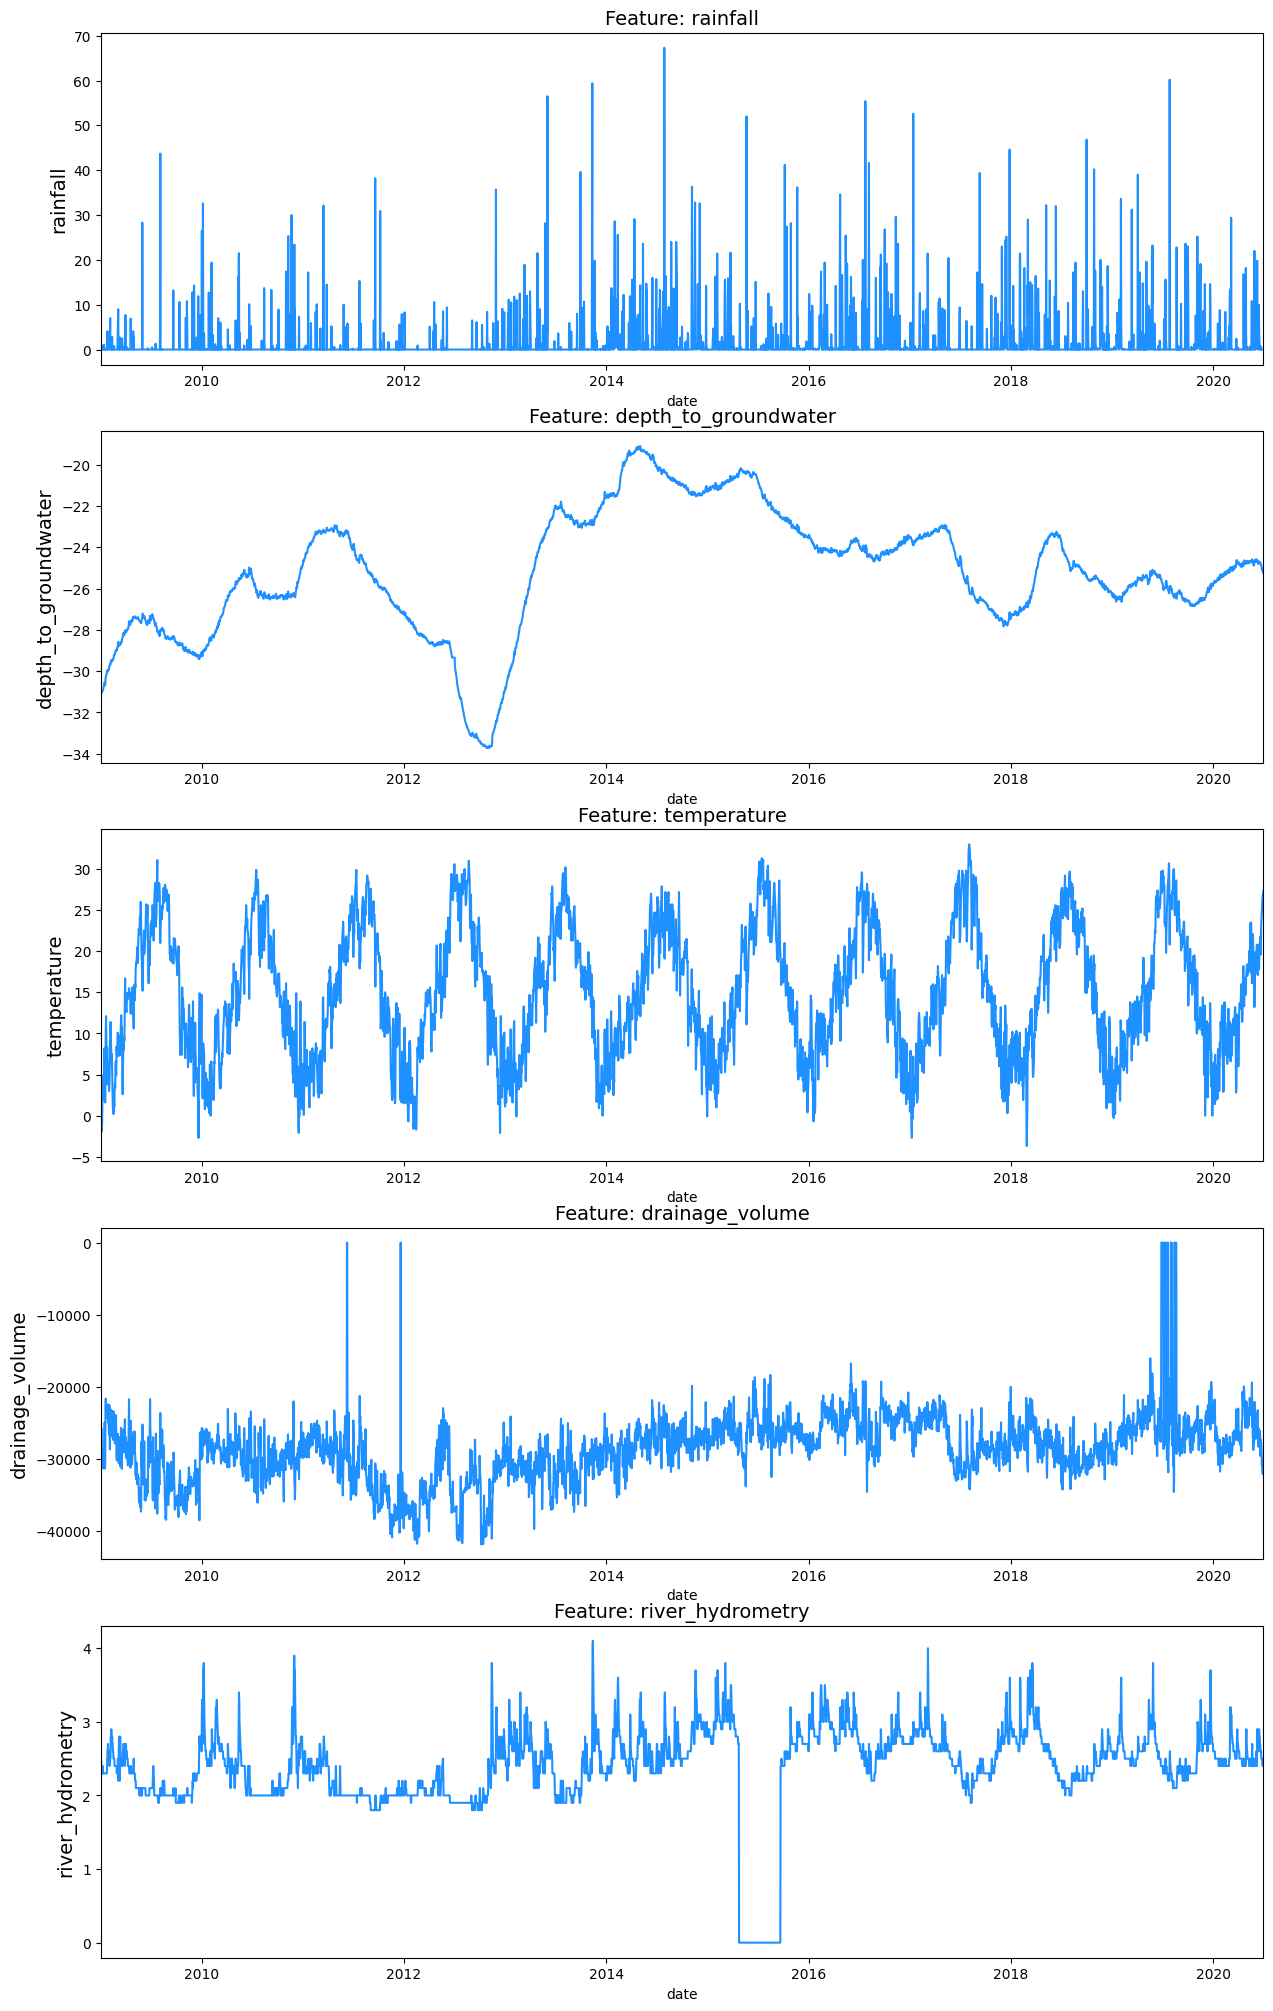

In [38]:
# To complete the data, as naive method, we will use .ffill()
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

for i, column in enumerate(df.drop('date', axis=1).columns):
    sns.lineplot(x=df['date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)

    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

<a id='2'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">2. Data Preprocessing ⚙️</p>

## DATA PROCESSING

# Chronological Order and Equidistant Timestamps


In [39]:
df = df.sort_values(by='date')

# Check time intervals
df['delta'] = df['date'] - df['date'].shift(1)

df[['date', 'delta']].head()

date  delta
0 2009-01-01    NaT
1 2009-01-02 1 days
2 2009-01-03 1 days
3 2009-01-04 1 days
4 2009-01-05 1 days

In [40]:
df['delta'].sum(), df['delta'].count()

(Timedelta('4198 days 00:00:00'), 4198)

## Handle Missing Values 

Pplotting the time series reveals that there seem to be **some zero values that seem to be nulls** for `drainage_volume`, and `river_hydrometry`. We will have to clean them by replacing them with NaN values and filling them afterward.

In [41]:
df = df.drop('delta', axis=1)
df.isna().sum()

date                     0
rainfall                 0
depth_to_groundwater    27
temperature              0
drainage_volume          1
river_hydrometry         0
dtype: int64

(14245.0, 18443.0)

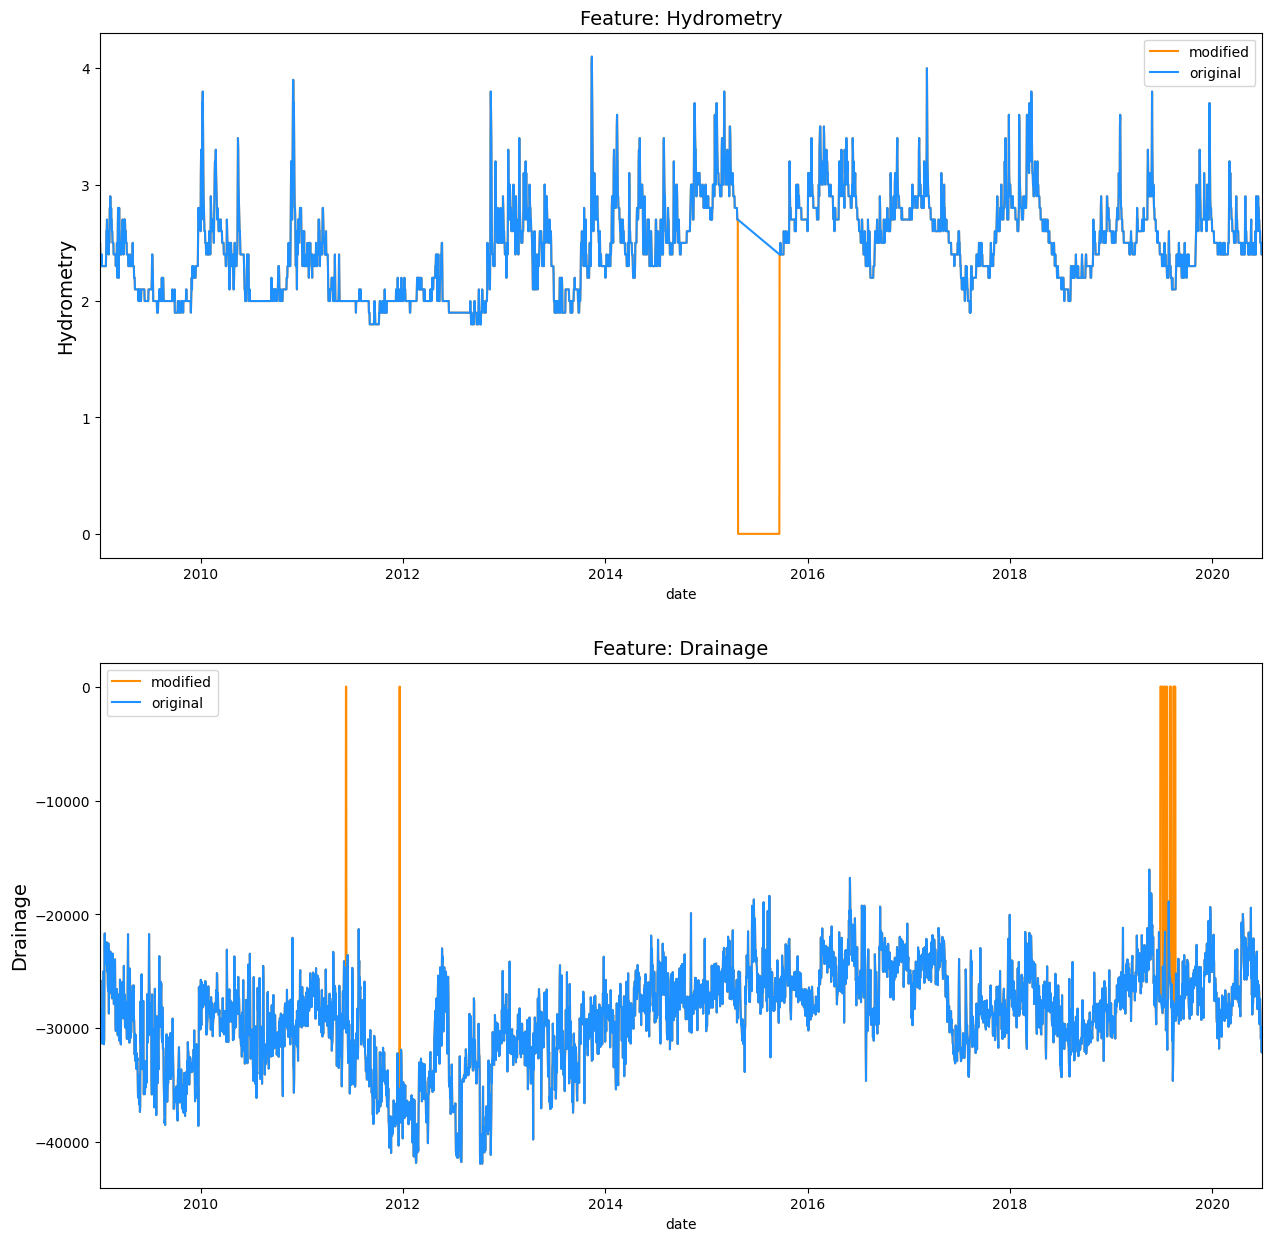

In [42]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

old_hydrometry = df['river_hydrometry'].copy()
df['river_hydrometry'] = df['river_hydrometry'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_hydrometry, ax=ax[0], color='darkorange', label='modified')
sns.lineplot(x=df['date'], y=df['river_hydrometry'].fillna(np.inf), ax=ax[0], color='dodgerblue', label='original')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

old_drainage = df['drainage_volume'].copy()
df['drainage_volume'] = df['drainage_volume'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_drainage, ax=ax[1], color='darkorange', label='modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='original')
ax[1].set_title('Feature: Drainage', fontsize=14)
ax[1].set_ylabel(ylabel='Drainage', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

So now we have to fix the missing values. Let's take a look at these cases and explore what can we do with them.

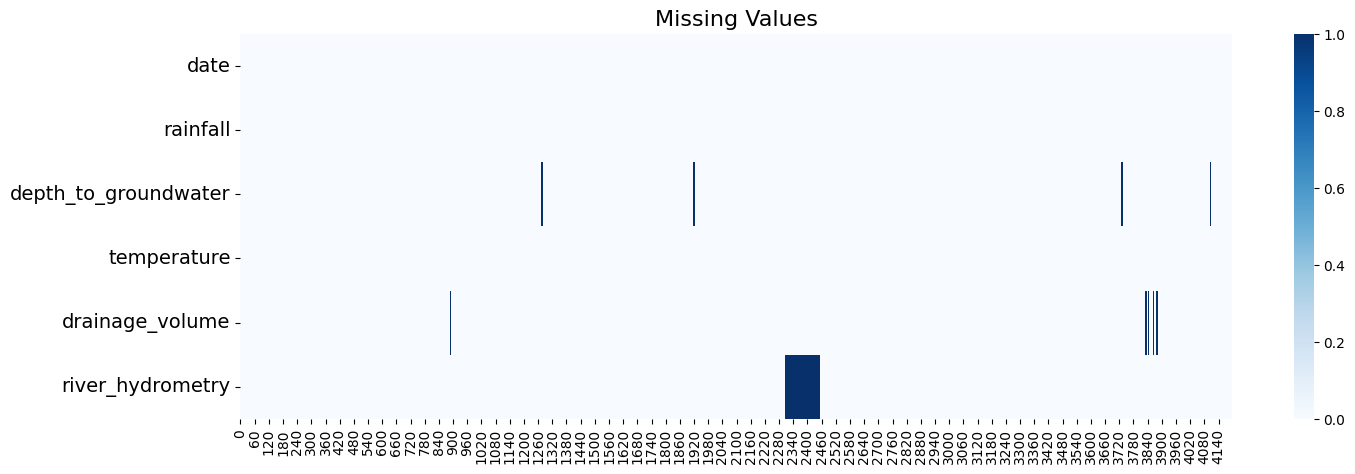

In [43]:
# Fix the missing values

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

# Iterate through the y-axis ticks
for tick in ax.yaxis.get_major_ticks():
    # Set the fontsize of the tick label using get_text() and set_fontsize()
    tick.label1.set_fontsize(14)
plt.show()

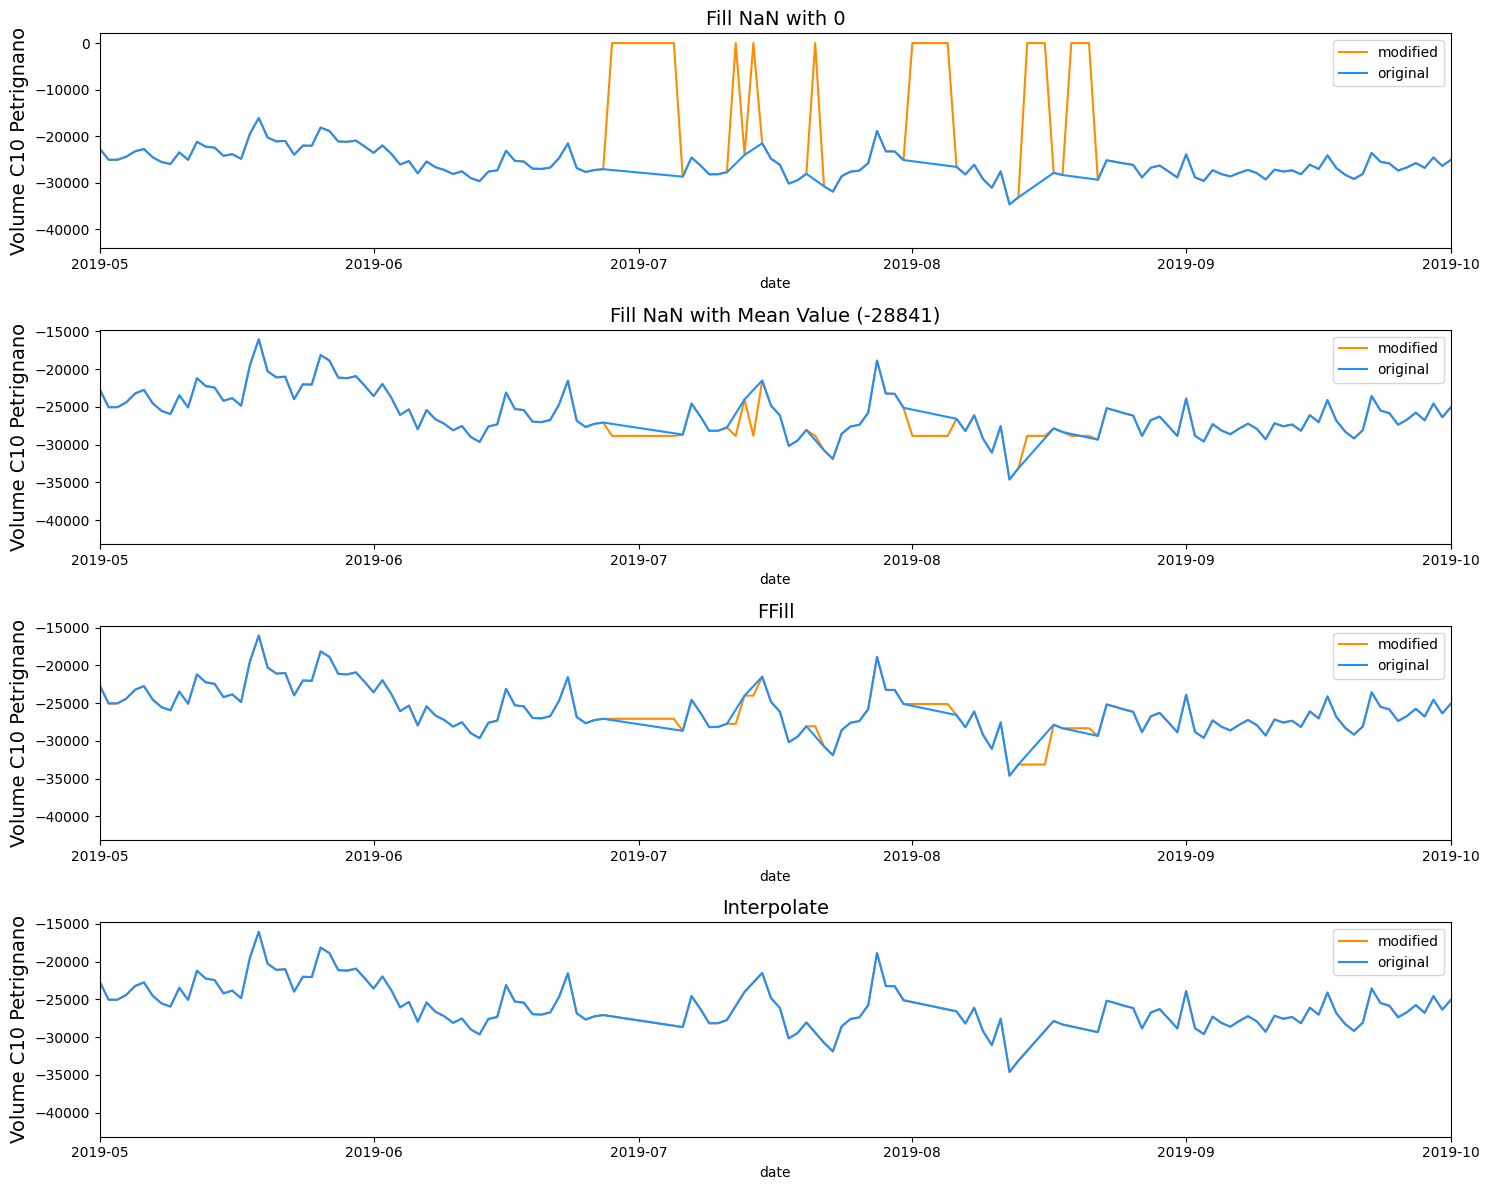

In [44]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

mean_drainage = df['drainage_volume'].mean()
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(mean_drainage), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['date'], y=df['drainage_volume'].ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['date'], y=df['drainage_volume'].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])

plt.tight_layout()
plt.show()

As we can see, the last option in this case, **seems to be the best option!**

So, let's interpolate missing values

In [45]:
df['drainage_volume'] = df['drainage_volume'].interpolate()
df['river_hydrometry'] = df['river_hydrometry'].interpolate()
df['depth_to_groundwater'] = df['depth_to_groundwater'].interpolate()

## Smoothing Data - Resampling
Resampling can provide additional information on the data. 

* **Upsampling** is when the frequency of samples is increased (e.g. days to hours)
* **Downsampling** is when the frequency of samples is decreased (e.g. days to weeks)

In this example, we will do some downsampling with the `.resample()` function (similar to groupby and aggregate as mean).

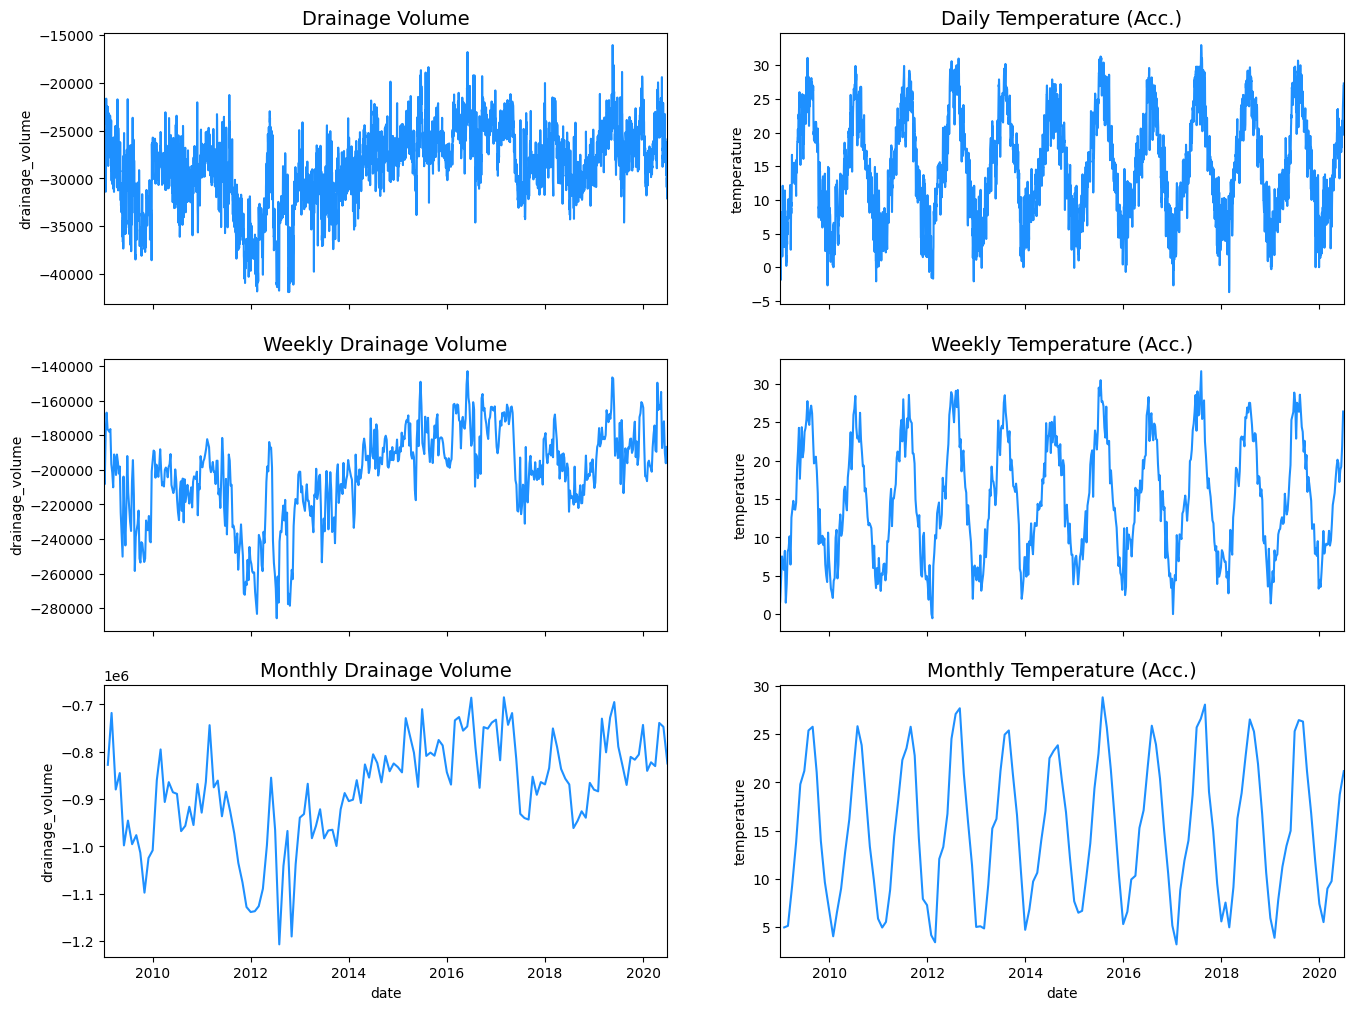

In [46]:
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16,12))

sns.lineplot(x='date', y='drainage_volume', data=df, color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Drainage Volume', fontsize=14)

resampled_df = df[['date','drainage_volume']].resample('7D', on='date').sum().reset_index(drop=False)
sns.lineplot(x='date', y='drainage_volume', data=resampled_df, color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly Drainage Volume', fontsize=14)

resampled_df = df[['date','drainage_volume']].resample('M', on='date').sum().reset_index(drop=False)
sns.lineplot(x='date', y='drainage_volume', data=resampled_df, color='dodgerblue', ax=ax[2, 0])
ax[2, 0].set_title('Monthly Drainage Volume', fontsize=14)

for i in range(3):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(x='date', y='temperature', data=df, color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily Temperature (Acc.)', fontsize=14)

resampled_df = df[['date','temperature']].resample('7D', on='date').mean().reset_index(drop=False)
sns.lineplot(x='date', y='temperature', data=resampled_df, color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly Temperature (Acc.)', fontsize=14)

resampled_df = df[['date','temperature']].resample('M', on='date').mean().reset_index(drop=False)
sns.lineplot(x='date', y='temperature', data=resampled_df, color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly Temperature (Acc.)', fontsize=14)

for i in range(3):
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()

In [47]:
# As we can see, downsample to weekly could smooth the data and help with analysis
downsample = df[['date',
                 'depth_to_groundwater',
                 'temperature',
                 'drainage_volume',
                 'river_hydrometry',
                 'rainfall'
                ]].resample('7D', on='date').mean().reset_index(drop=False)

df = downsample.copy()

# Check stationarity 


1. **Visually**: plot time series and check for trends or seasonality.
2. **Basic statistics**: split time series and compare the mean and variance of each partition.
3. **Statistical test**: Augmented Dickey Fuller test.

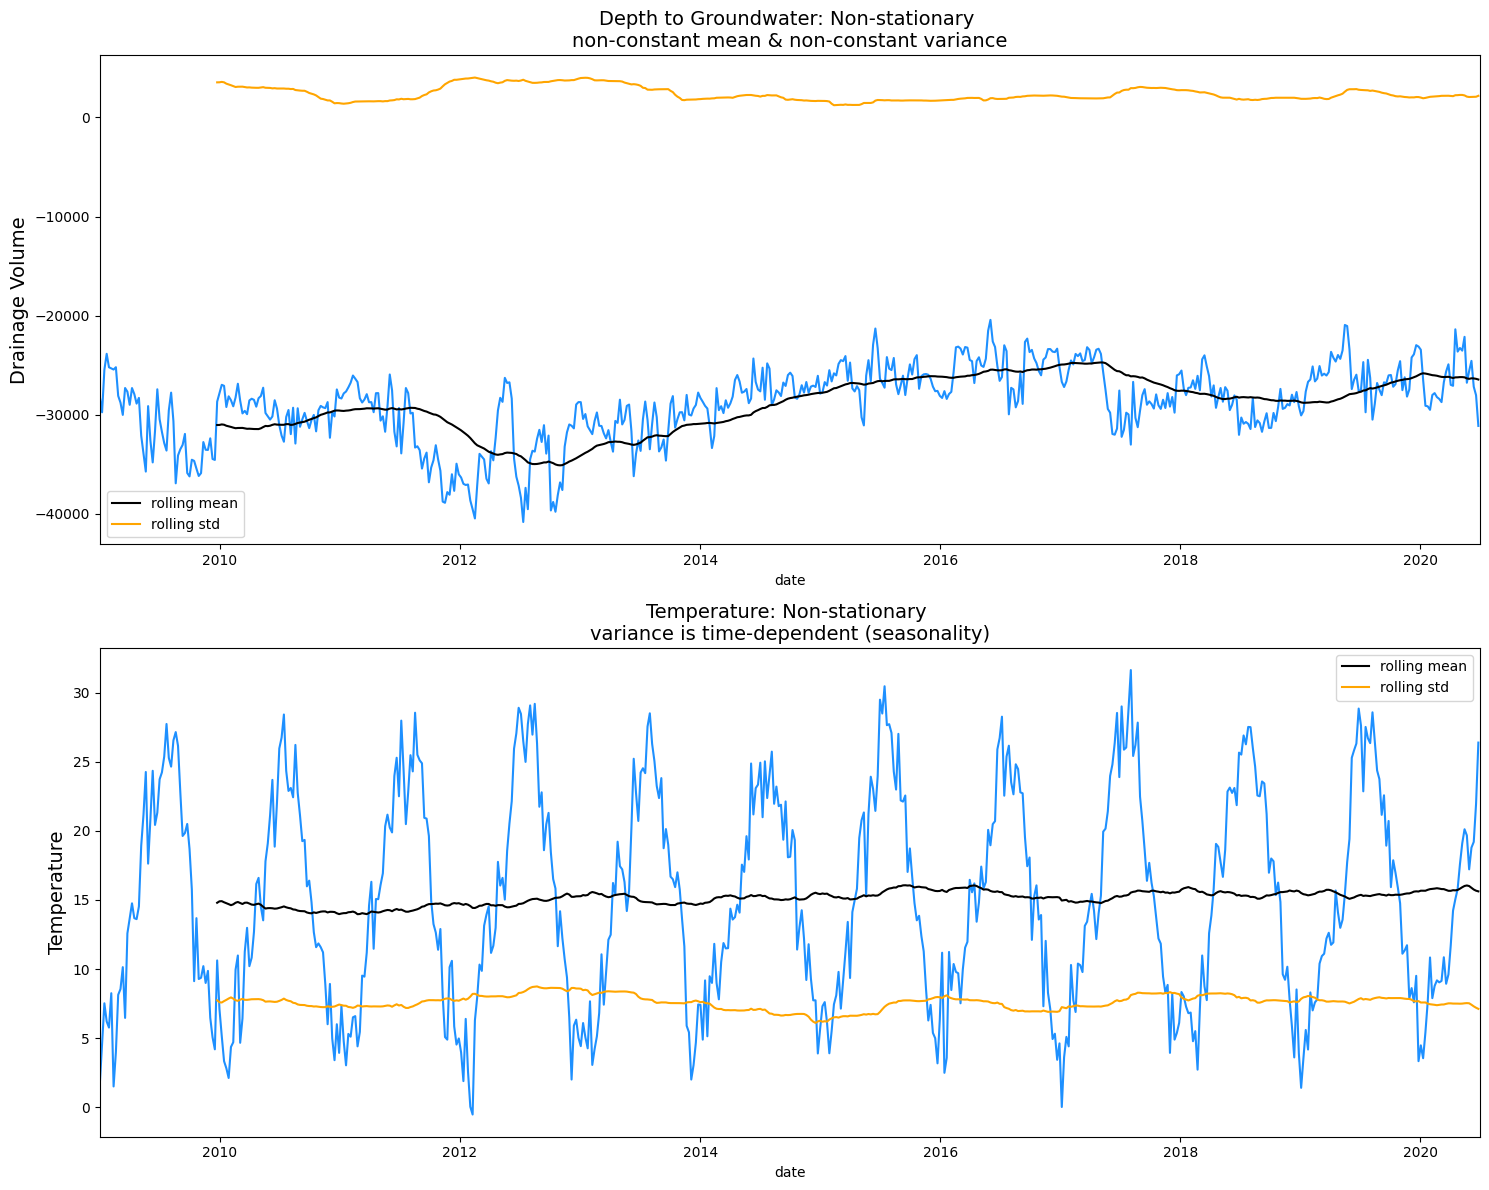

In [48]:
# A year has 52 weeks (52 weeks * 7 days per week) aprox.
rolling_window = 52
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.lineplot(x=df['date'], y=df['drainage_volume'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=df['date'], y=df['drainage_volume'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=df['date'], y=df['drainage_volume'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
ax[0].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0].set_ylabel(ylabel='Drainage Volume', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(x=df['date'], y=df['temperature'], ax=ax[1], color='dodgerblue')
sns.lineplot(x=df['date'], y=df['temperature'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=df['date'], y=df['temperature'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
ax[1].set_title('Temperature: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

In this **visual check**, we can see that the **features don't have constant mean and std**, but they are close to it.

<a id='2.3.1'></a>
### Unit Root Test

Unit root is a characteristic of a time series that makes it non-stationary, and ADF test belongs to the unit root test. Technically, a unit root is said to exist in a time series with a value of `alpha=1` in the below equation.

$Y_t = 	\alpha Y_{t-1} + 	\beta X_{e} + \epsilon $

Where `Yt` is the value of the time series at time `t` and `Xe` is an exogenous variable.

### **The presence of a unit root means the time series is non-stationary.**



## **Augmented Dickey-Fuller (ADF)** test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.

* **Null Hypothesis (H0)**: Time series has a unit root. (Time series is not stationary).

* **Alternate Hypothesis (H1)**: Time series has no unit root (Time series is stationary).

**If the null hypothesis can be rejected, we can conclude that the time series is stationary.**

There are two ways to reject the null hypothesis:

On the one hand, the null hypothesis can be rejected if the `p-value` is below a set significance level. The default significance level is 5%

* <font color='red'>**p-value > significance level (default: 0.05)**</font>: Fail to reject the null hypothesis (H0), the data has a unit root and is <font color='red'>non-stationary</font>.
* <font color='green'>**p-value <= significance level (default: 0.05)**</font>: Reject the null hypothesis (H0), the data does not have a unit root and is <font color='green'>stationary</font>.
    
On the other hand, the null hypothesis can be rejected if the test statistic is less than the critical value.

* <font color='red'>**ADF statistic > critical value**</font>: Fail to reject the null hypothesis (H0), the data has a unit root and is <font color='red'>non-stationary</font>.
* <font color='green'>**ADF statistic < critical value**</font>: Reject the null hypothesis (H0), the data does not have a unit root and is <font color='green'>stationary</font>.

In [49]:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['depth_to_groundwater'].values)
result

(-2.8802016493166605,
 0.047699190920208856,
 7,
 592,
 {'1%': -3.441444394224128,
  '5%': -2.8664345376276454,
  '10%': -2.569376663737217},
 -734.3154255877616)

# Reflections on the Augmented Dickey-Fuller (ADF) test and p-value results:

1. ADF Statistic: -2.8802016493166605
Calculated test statistic from the ADF test. It's a measure of how strongly the data suggests stationarity.

2. p-value: 0.047699190920208856
p-value associated with the ADF statistic. It represents the probability of observing the given data if the time series were actually non-stationary.

3. Number of Lags Used: 7
This is the number of lags included in the ADF test. Lags are previous values of the time series used in the calculation.

4. Number of Observations Used: 592
This is the number of data points used in the ADF test after accounting for lags.

5. Critical Values: {'1%': -3.441444394224128, '5%': -2.8664345376276454, '10%': -2.569376663737217}
These are the critical values for the ADF test at different significance levels (1%, 5%, and 10%). They are used to determine whether to reject the null hypothesis.

6. IC Best: -734.3154255877616
This is the maximized information criterion if autolag is not None.

**Interpretation:**
Test Statistic vs. Critical Values: Compare the ADF statistic (-2.8802) with the critical values. 
    * If the test statistic is less than the critical value at a given significance level, we can reject the null hypothesis (non-stationarity). 
    * **In this case, the test statistic is less than the critical value at the 5% significance level but not the 1% significance level.**
    * p-value: If the p-value is less than your chosen significance level (usually 0.05), we can reject the null hypothesis. 
    * **In this case, the p-value is 0.0477, which is less than 0.05.**

**Conclusion:**

Based on both the test statistic and the p-value, **we have evidence to reject the null hypothesis of non-stationarity at the 5% significance level**. **This suggests that the time series df['depth_to_groundwater'] is likely stationary.**

Now, we are going to check for each variable:
- The p-value is less than 0.05.
- Check the range of the ADF statistic compared with critical_values.

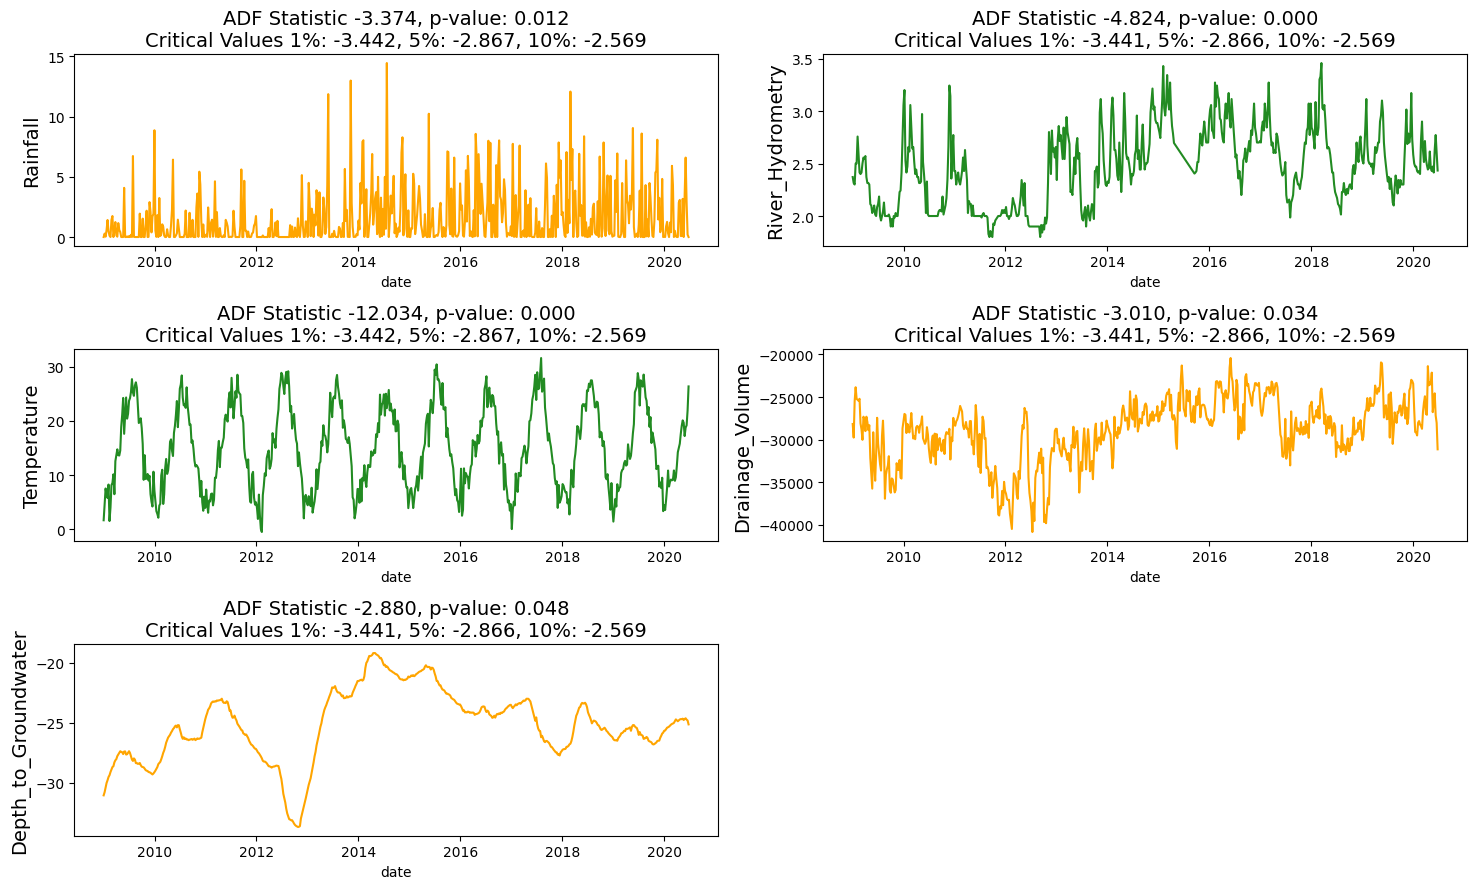

In [50]:
# Thanks to https://www.kaggle.com/iamleonie for this function!
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen'
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df['date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df['rainfall'].values, 'Rainfall', ax[0, 0])
visualize_adfuller_results(df['temperature'].values, 'Temperature', ax[1, 0])
visualize_adfuller_results(df['river_hydrometry'].values, 'River_Hydrometry', ax[0, 1])
visualize_adfuller_results(df['drainage_volume'].values, 'Drainage_Volume', ax[1, 1])
visualize_adfuller_results(df['depth_to_groundwater'].values, 'Depth_to_Groundwater', ax[2, 0])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

If the data is not stationary but we want to use a model such as ARIMA (that requires this characteristic), the data has to be transformed.

The two most common methods to transform series into stationarity ones are:

* **Transformation**: e.g. log or square root to stabilize non-constant variance
* **Differencing**: subtracts the current value from the previous

## Data Transformation

<Axes: xlabel='depth_to_groundwater_log', ylabel='Density'>

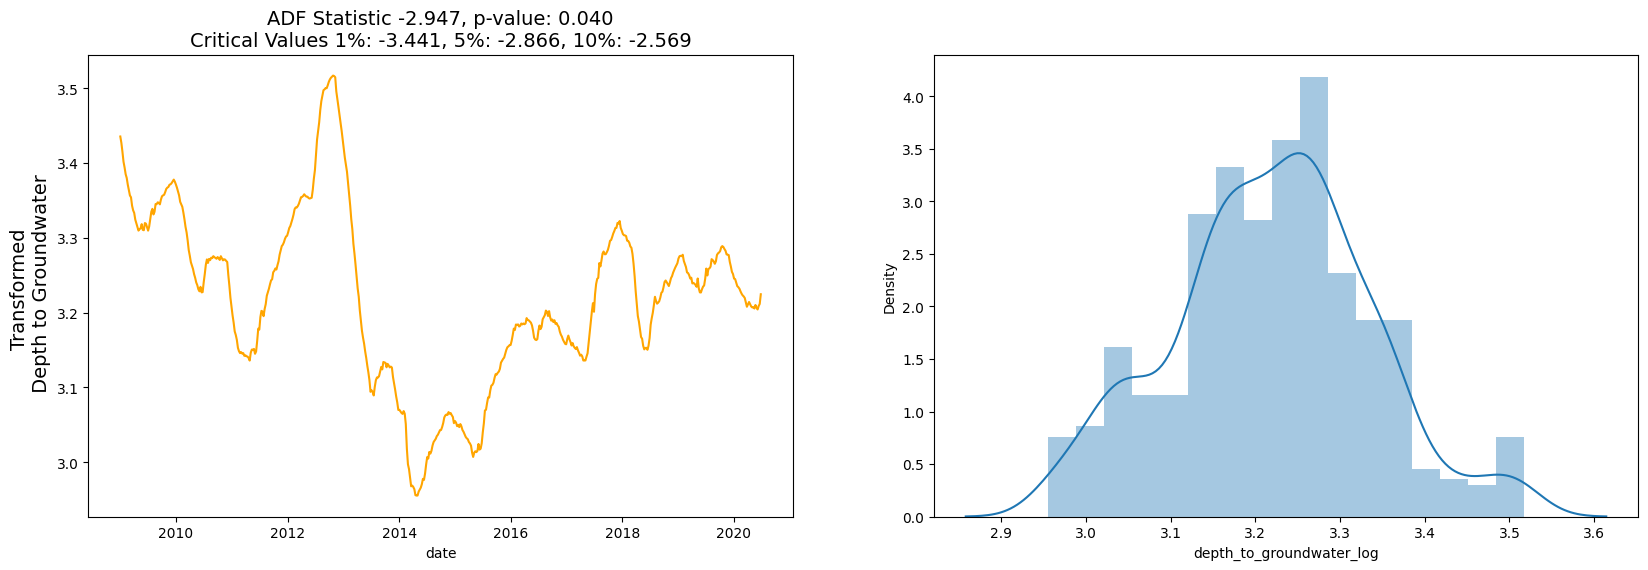

In [ ]:

# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
df['depth_to_groundwater_log'] = np.log(abs(df['depth_to_groundwater']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(df['depth_to_groundwater_log'], 'Transformed \n Depth to Groundwater', ax[0])

sns.distplot(df['depth_to_groundwater_log'], ax=ax[1])

Differencing can be done in different orders:
* First order differencing: linear trends with $z_i = y_i - y_{i-1}$
* Second-order differencing: quadratic trends with $z_i = (y_i - y_{i-1}) - (y_{i-1} - y_{i-2})$
* And so on...

## Data Differencing

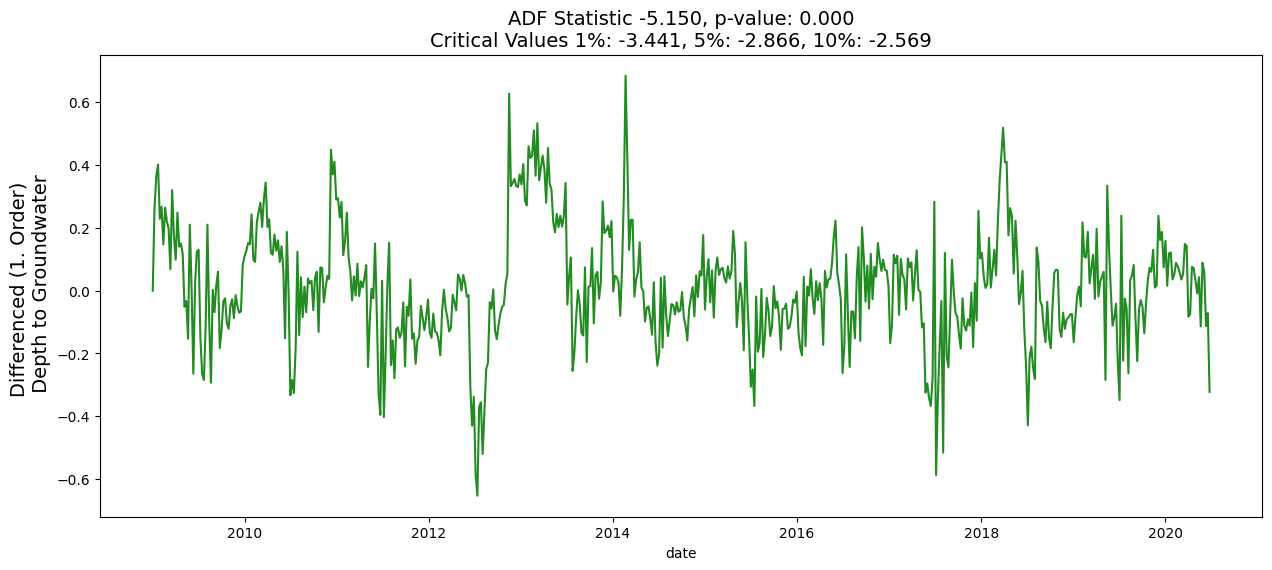

In [52]:
# First Order Differencing
ts_diff = np.diff(df['depth_to_groundwater'])
df['depth_to_groundwater_diff_1'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['depth_to_groundwater_diff_1'], 'Differenced (1. Order) \n Depth to Groundwater', ax)

# Feature engineering

In [53]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['day_of_year'] = pd.DatetimeIndex(df['date']).dayofyear
df['week_of_year'] = df['date'].apply(lambda x: x.isocalendar().week)
df['quarter'] = pd.DatetimeIndex(df['date']).quarter
df['season'] = df['month'] % 12 // 3 + 1

df[['date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

date  year  month  day  day_of_year  week_of_year  quarter  season
0 2009-01-01  2009      1    1            1             1        1       1
1 2009-01-08  2009      1    8            8             2        1       1
2 2009-01-15  2009      1   15           15             3        1       1
3 2009-01-22  2009      1   22           22             4        1       1
4 2009-01-29  2009      1   29           29             5        1       1

# Encoding Cyclical Features

The new time features are now cyclical. For example, the feature month cycles between 1 and 12 for every year. While the difference between each month increments by 1 during the year, between two years the `month` feature jumps from 12 (December) to 1 (January). This results in a -11 difference, which can confuse a lot of models.

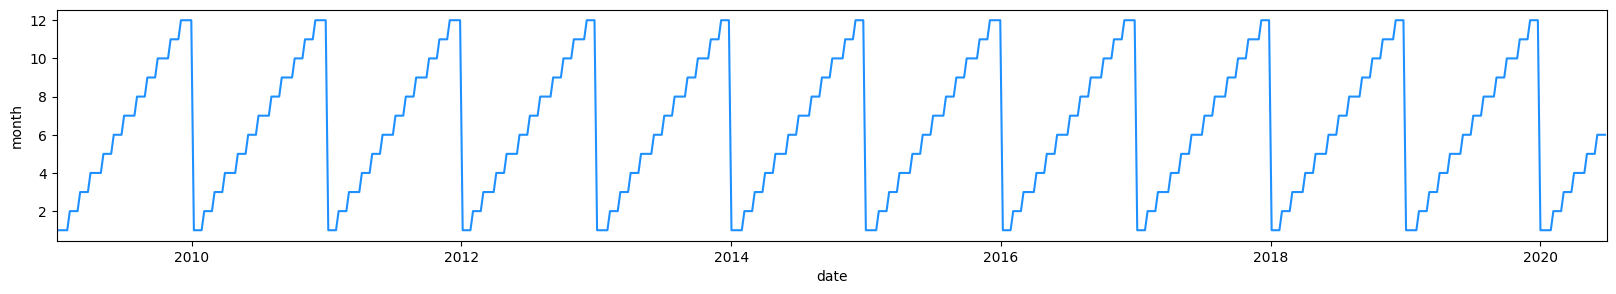

In [54]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=df['date'], y=df['month'], color='dodgerblue')
ax.set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()

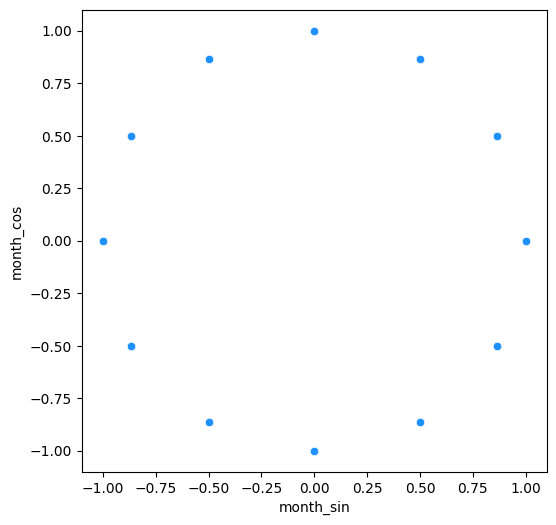

In [55]:
month_in_year = 12
df['month_sin'] = np.sin(2*np.pi*df['month']/month_in_year)
df['month_cos'] = np.cos(2*np.pi*df['month']/month_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df.month_sin, y=df.month_cos, color='dodgerblue')
plt.show()

# TimeSeries Decomposition

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

These components are defined as follows:

- **Level**: The average value in the series.
- **Trend**: The increasing or decreasing value in the series.
- **Seasonality**: The repeating short-term cycle in the series.
- **Noise**: The random variation in the series.

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

All series have a level and noise. The trend and seasonality components are optional.

It is helpful to think of the components as combining either additively or multiplicatively:
- **Additive**: $y(t) = Level + Trend + Seasonality + Noise$
- **Multiplicative**: $y(t) = Level * Trend * Seasonality * Noise$

In this case, we are going to use the function `seasonal_decompose()` from the [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) library.

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'rainfall', 'temperature', 'drainage_volume',
    'river_hydrometry', 'depth_to_groundwater'
]

for column in core_columns:
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

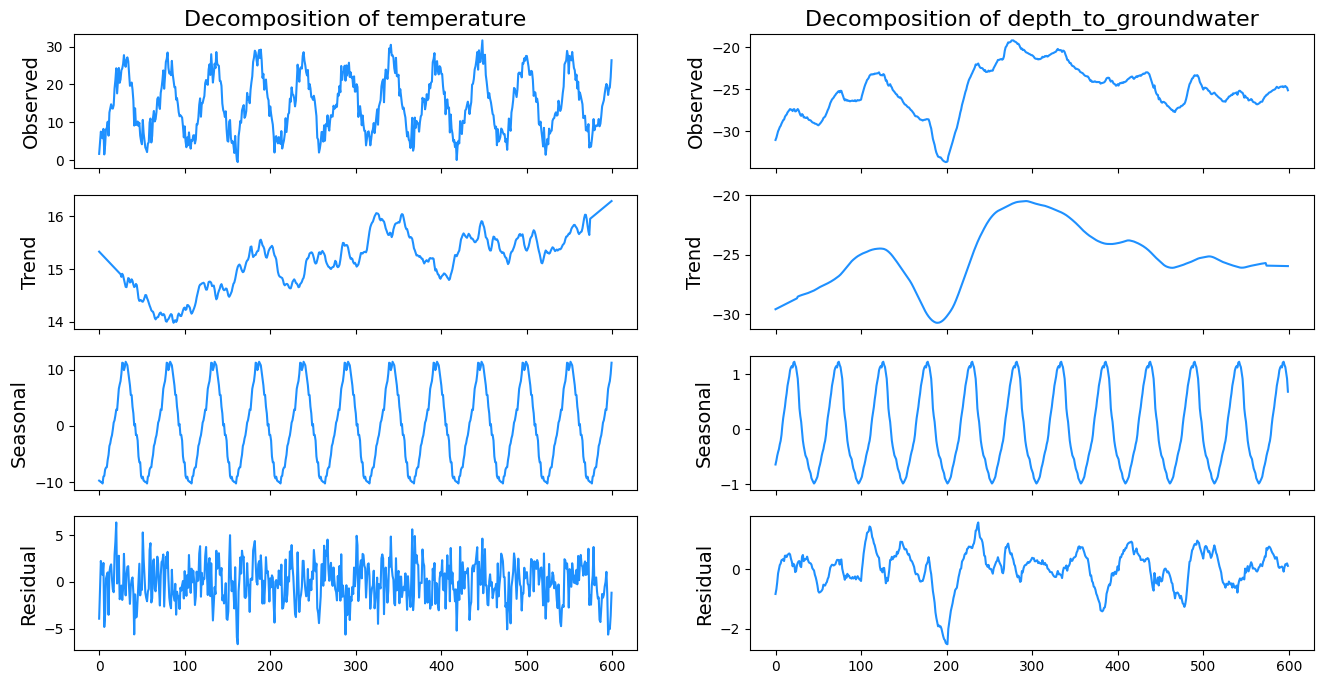

In [57]:
# ipython-input-72-af7b89fb2615 and ipython-input-73-af7b89fb2615

from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'rainfall', 'temperature', 'drainage_volume',
    'river_hydrometry', 'depth_to_groundwater'
]

for column in core_columns:
    # Replacing 'freq' with 'period' to specify seasonality
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal


fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['temperature', 'depth_to_groundwater']):

    # Replacing 'freq' with 'period' to specify seasonality
    res = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)

    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

# Lag

We want to calculate each variable with a `shift()` (lag) to compare the correlation with the other variables.

You can see [documentation for the shift function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html) for more information.

In [58]:
weeks_in_month = 4

for column in core_columns:
    df[f'{column}_seasonal_shift_b_2m'] = df[f'{column}_seasonal'].shift(-2 * weeks_in_month)
    df[f'{column}_seasonal_shift_b_1m'] = df[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    df[f'{column}_seasonal_shift_1m'] = df[f'{column}_seasonal'].shift(1 * weeks_in_month)
    df[f'{column}_seasonal_shift_2m'] = df[f'{column}_seasonal'].shift(2 * weeks_in_month)
    df[f'{column}_seasonal_shift_3m'] = df[f'{column}_seasonal'].shift(3 * weeks_in_month)

# Exploratory Data Analysis

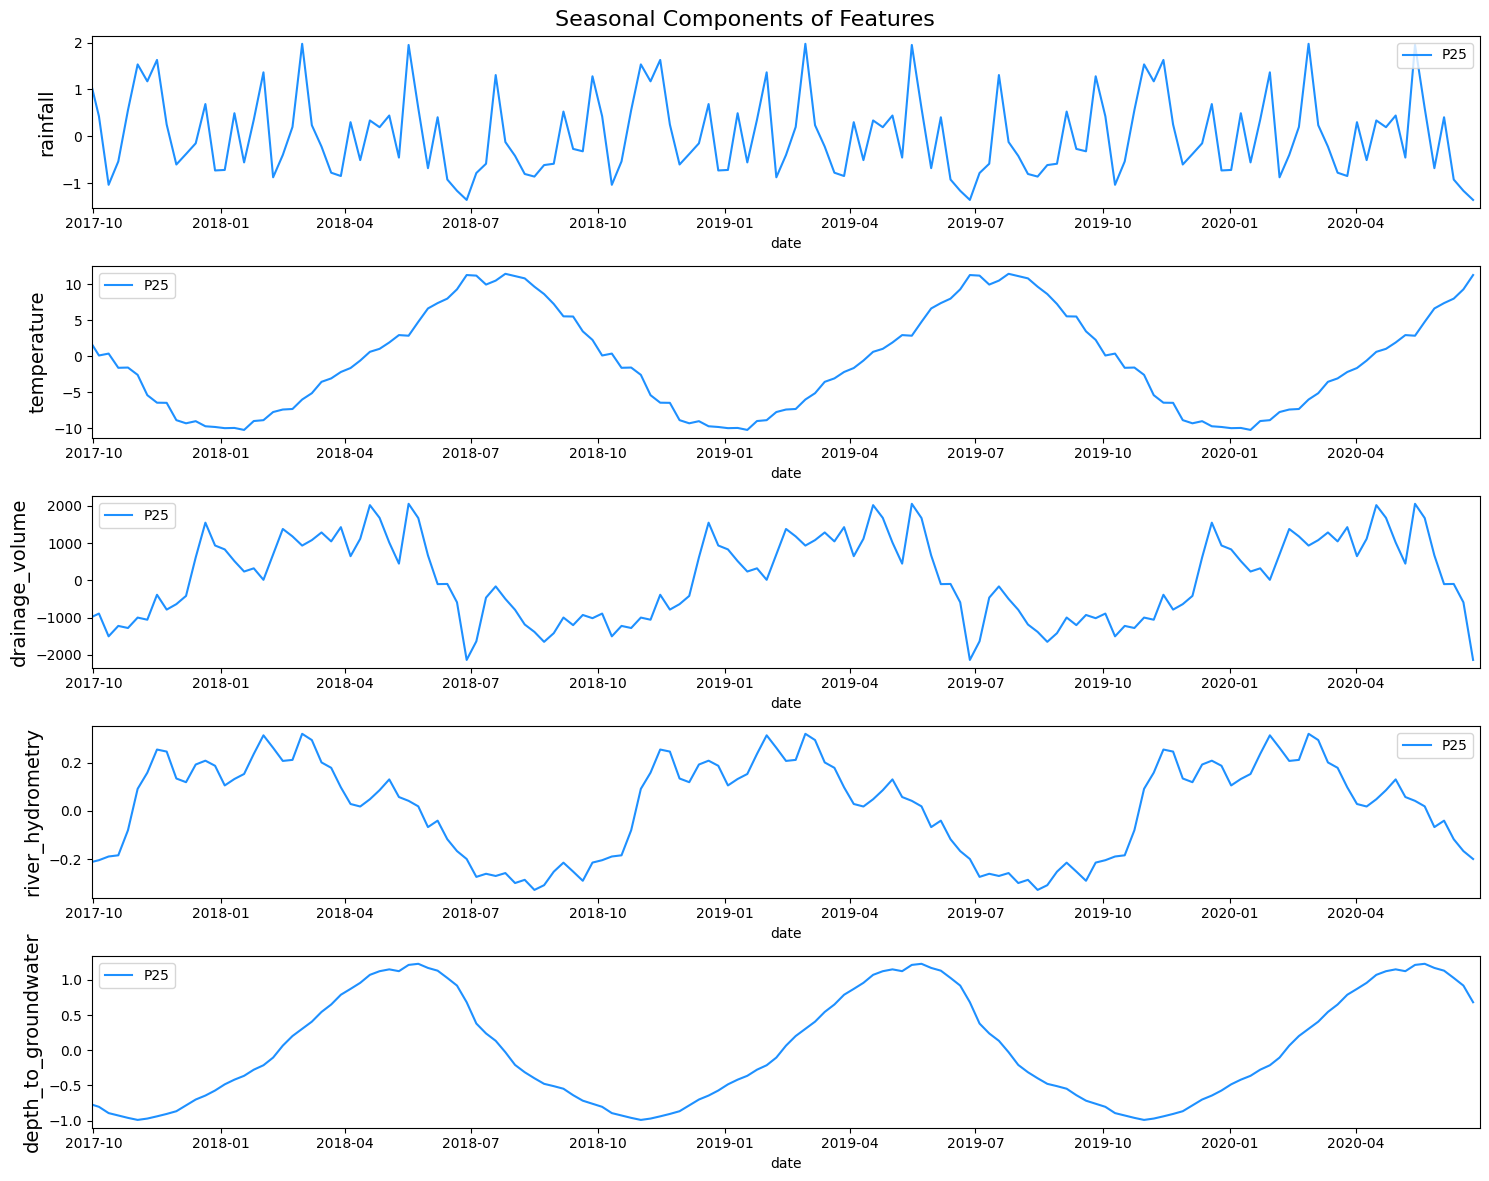

In [59]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=df['date'], y=df[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2017, 9, 30), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

As we can see:

- **depth_to_groundwater**: reaches its maximum around May/June and its minimum around November
- **temperature**: reaches its maximum around August and its minimum around January
- **drainage_volume**: reaches its minimum around July.
- **river_hydrometry**: reaches its maximum around February/March and its minimum around September

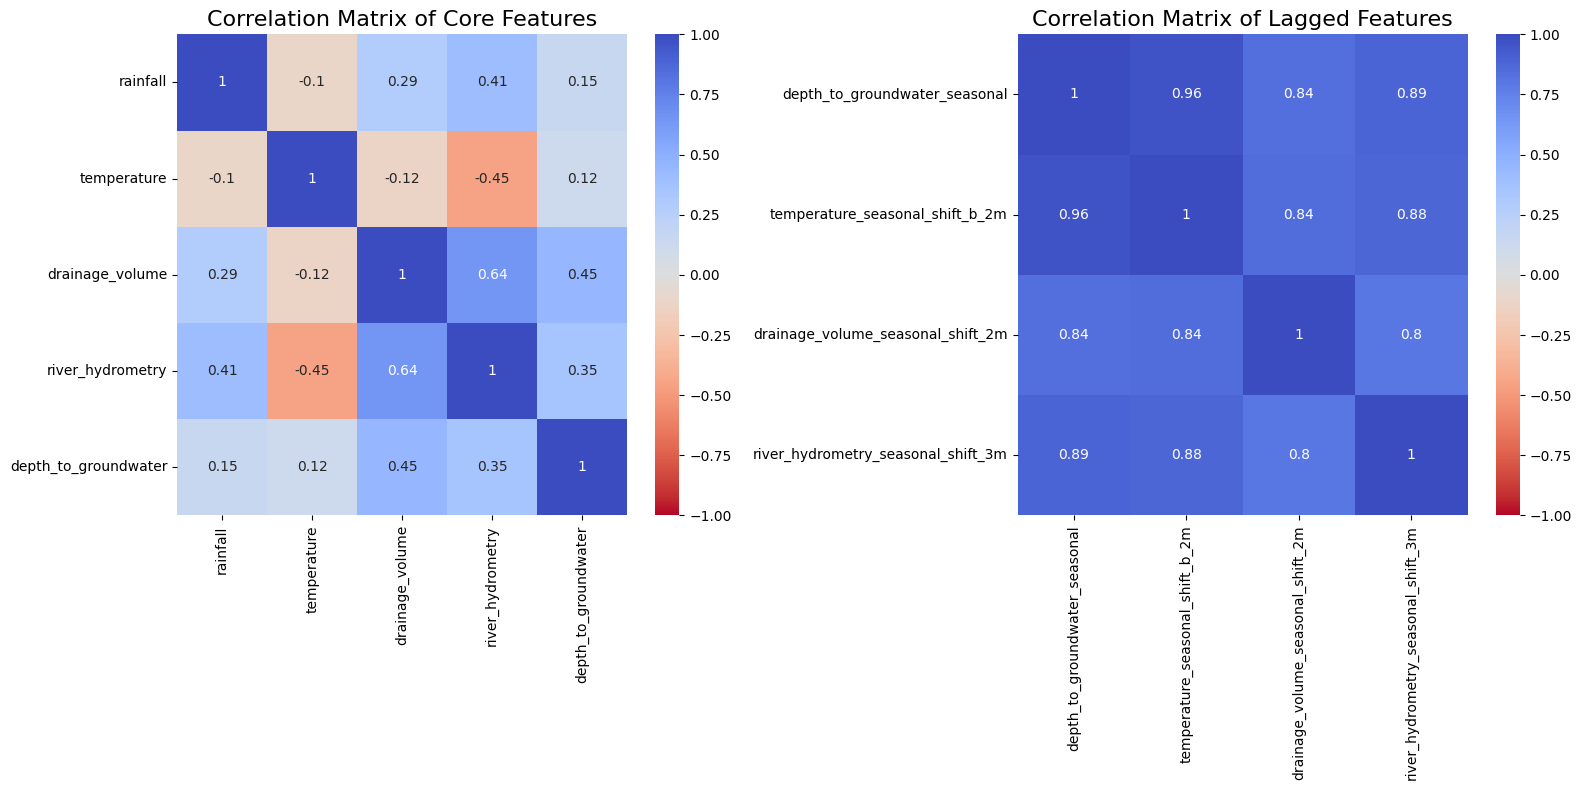

In [60]:
# Visualizing seasonal correlations

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

corrmat = df[core_columns].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Core Features', fontsize=16)

shifted_cols = [
    'depth_to_groundwater_seasonal',
    'temperature_seasonal_shift_b_2m',
    'drainage_volume_seasonal_shift_2m',
    'river_hydrometry_seasonal_shift_3m'
]
corrmat = df[shifted_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Lagged Features', fontsize=16)


plt.tight_layout()
plt.show()

As we can see, the features are highly correlated in the case of shifted features (lagged ones) compared to the original ones.

# Autocorrelation Analysis

ACF and PACF plots: After a time series has been stationarized by differencing, the next step in fitting an ARIMA model is to determine whether AR or MA terms are needed to correct any autocorrelation that remains in the differenced series. Of course, with software like Statgraphics, you could just try some different combinations of terms and see what works best. But there is a more systematic way to do this. By looking at the **autocorrelation function (ACF)** and **partial autocorrelation (PACF)** plots of the differenced series, you can tentatively identify the numbers of AR and/or MA terms that are needed.

* **Autocorrelation Function (ACF)**: P = Periods to lag for eg: (if P= 3 then we will use the three previous periods of our time series in the autoregressive portion of the calculation) P helps adjust the line that is being fitted to forecast the series. P corresponds with MA parameter
* **Partial Autocorrelation Function (PACF)**: D = In an ARIMA model we transform a time series into stationary one(series without trend or seasonality) using differencing. D refers to the number of differencing transformations required by the time series to get stationary. D corresponds with AR parameter.

Autocorrelation plots will help in detecting seasonality.

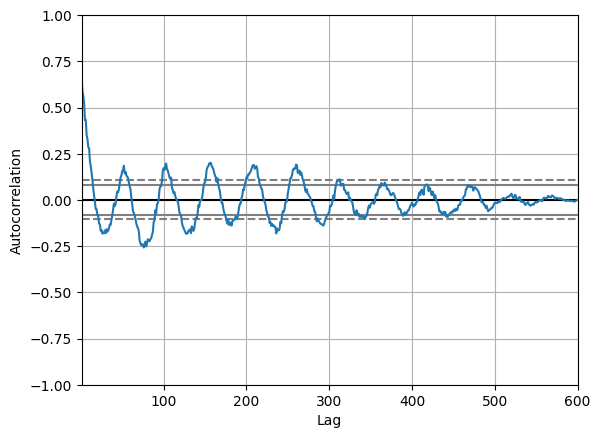

In [61]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['depth_to_groundwater_diff_1'])
plt.show()

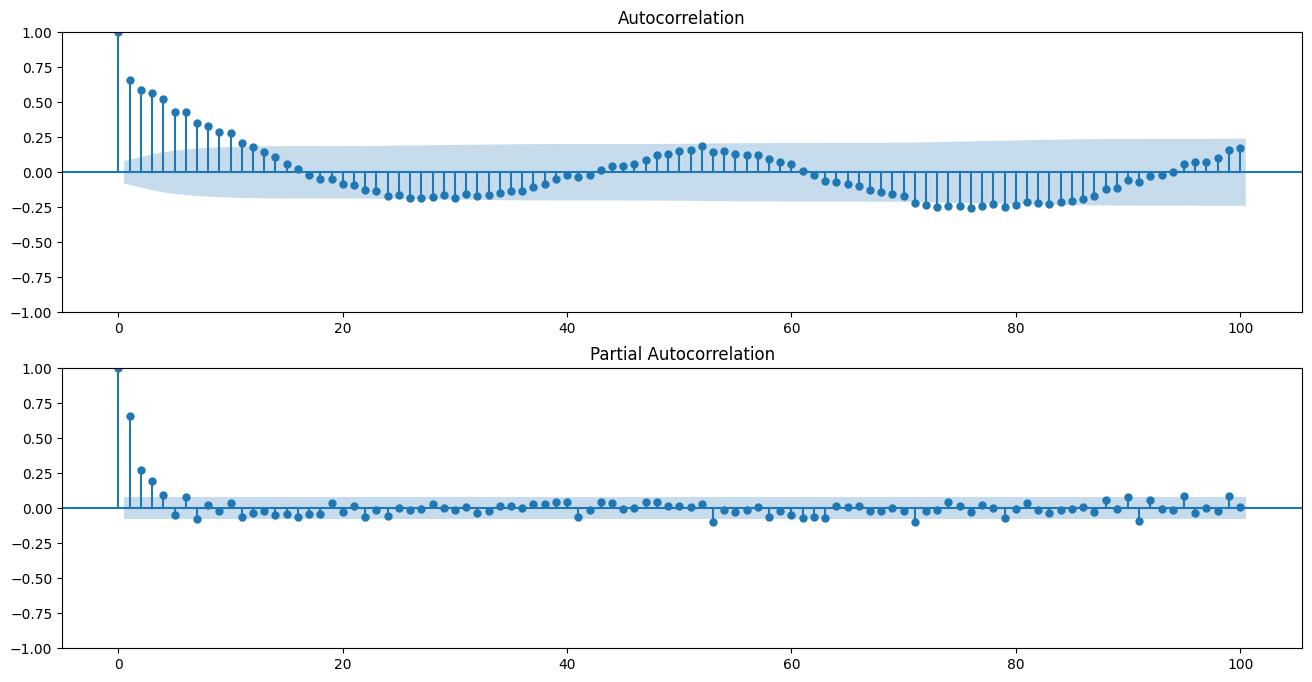

In [62]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df['depth_to_groundwater_diff_1'], lags=100, ax=ax[0])
plot_pacf(df['depth_to_groundwater_diff_1'], lags=100, ax=ax[1])

plt.show()

# Data Modeling

- **Univariate** time series only have a single time-dependent variable.
- **Multivariate** time series have multiple time-dependent variables.
- Cross-validation technic for TimeSeries Analysis.

In [63]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df['date']
y = df['depth_to_groundwater']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

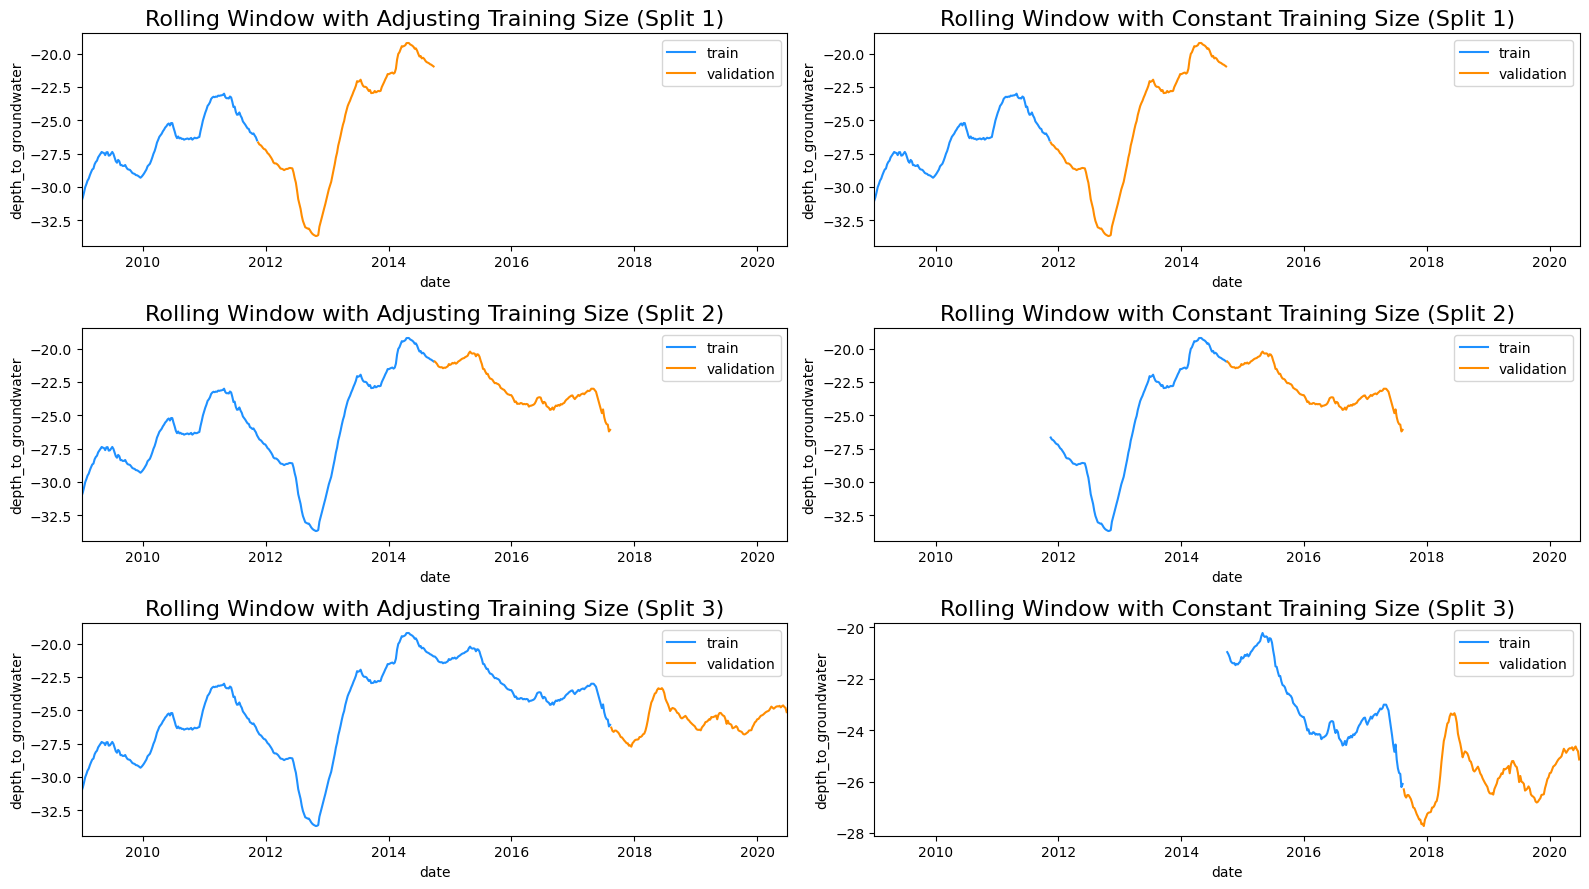

In [64]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(
        x=X_train,
        y=y_train,
        ax=ax[i,0],
        color='dodgerblue',
        label='train'
    )
    sns.lineplot(
        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))],
        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))],
        ax=ax[i,1],
        color='dodgerblue',
        label='train'
    )

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

The idea behind this plot is to understand which train and test set are we using to fit the model in each iteration.

## Testing Models for Univariate Time Series

First of all, we are going to analyze univariate TimeSeries forecasting.

**Univariate time series**: Only one variable is varying over time. For example, data collected from a sensor measuring the temperature of a room every second. Therefore, each second, you will only have a one-dimensional value, which is the temperature.

In [65]:
train_size = int(0.85 * len(df))
test_size = len(df) - train_size

univariate_df = df[['date', 'depth_to_groundwater']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

510 90


## Facebook Prophet 

The first model (which can also handle multivariate problems) what we are going to try is Facebook Prophet.

Prophet, or “Facebook Prophet,” is an open-source library for univariate (one variable) time series forecasting developed by Facebook.

Prophet implements what they refer to as an additive time series forecasting model, and the implementation supports trends, seasonality, and holidays.

### **AFTER SEVERAL METHODS TO SET UP AND EXECUTE PROPHET MODEL, BELOW IS AN ALTERNATIVE SOLUTION (LOADING IT DIRECTLY FROM THE GITHUB REPO URL USSING LOGGING LIBRARY)**

In [87]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached httpstan-4.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pysimdjson-6.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached crashtest-0.3.1-py3-none-any.whl.metadata (748 bytes)
  Using cached pastel-0.2.1-py2.py3-none-any.whl.metadata (1.9 k

In [6]:
!pip install cmdstanpy
!pip install prophet


In [7]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
!pip install colorama
from colorama import Fore

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings
warnings.filterwarnings('ignore')

np.random.seed(7)

In [ ]:
# exe reset

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        pass
PATH = "data/raw/"
aquifer_auser_df = pd.read_csv(f"{PATH}Aquifer_Auser.csv")
aquifer_doganella_df = pd.read_csv(f"{PATH}Aquifer_Doganella.csv")
aquifer_luco_df = pd.read_csv(f"{PATH}Aquifer_Luco.csv")
aquifer_petrignano_df = pd.read_csv(f"{PATH}Aquifer_Petrignano.csv")
lake_biliancino_df = pd.read_csv(f"{PATH}Lake_Bilancino.csv")
river_arno_df = pd.read_csv(f"{PATH}River_Arno.csv")
water_spring_amiata_df = pd.read_csv(f"{PATH}Water_Spring_Amiata.csv")
water_spring_lupa_df = pd.read_csv(f"{PATH}Water_Spring_Lupa.csv")
water_spring_madonna_df = pd.read_csv(f"{PATH}Water_Spring_Madonna_di_Canneto.csv")

df = aquifer_petrignano_df
df.head()

train_size = int(0.85 * len(df))
test_size = len(df) - train_size

univariate_df = df[['date', 'depth_to_groundwater']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

<IPython.core.display.Javascript object>

Date  Rainfall_Bastia_Umbra  Depth_to_Groundwater_P24  \
0  14/03/2006                    NaN                    -22.48   
1  15/03/2006                    NaN                    -22.38   
2  16/03/2006                    NaN                    -22.25   
3  17/03/2006                    NaN                    -22.38   
4  18/03/2006                    NaN                    -22.60   

   Depth_to_Groundwater_P25  Temperature_Bastia_Umbra  Temperature_Petrignano  \
0                    -22.18                       NaN                     NaN   
1                    -22.14                       NaN                     NaN   
2                    -22.04                       NaN                     NaN   
3                    -22.04                       NaN                     NaN   
4                    -22.04                       NaN                     NaN   

   Volume_C10_Petrignano  Hydrometry_Fiume_Chiascio_Petrignano  
0                    NaN                                   NaN  
1                    NaN                                   NaN  
2                    NaN                                   NaN  
3                    NaN                                   NaN  
4                    NaN                                   NaN

In [ ]:
!pip install cmdstanpy
!pip install prophet


In [19]:
!pip install cmdstanpy
!pip install git+https://github.com/facebook/prophet/blob/main/python/prophet/forecaster.py


  Cloning https://github.com/facebook/prophet/blob/main/python/prophet/forecaster.py to /tmp/pip-req-build-1cubzv6g
  Running command git clone --filter=blob:none --quiet https://github.com/facebook/prophet/blob/main/python/prophet/forecaster.py /tmp/pip-req-build-1cubzv6g
  fatal: repository 'https://github.com/facebook/prophet/blob/main/python/prophet/forecaster.py/' not found
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/facebook/prophet/blob/main/python/prophet/forecaster.py /tmp/pip-req-build-1cubzv6g did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/facebook/prophet/blob/main/python/prophet/forecaster.py /tmp/pip-req-build-1cubzv6g did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error orig

In [22]:
!pip install git+https://github.com/facebook/prophet.git

  Cloning https://github.com/facebook/prophet.git to /tmp/pip-req-build-7_hi0yd9
  Running command git clone --filter=blob:none --quiet https://github.com/facebook/prophet.git /tmp/pip-req-build-7_hi0yd9
  Resolved https://github.com/facebook/prophet.git to commit dc1df4cb23a150e14858afb34c9442401c0eb2fc
ERROR: git+https://github.com/facebook/prophet.git does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [66]:
# Forecastrer alternative set up

import requests

# GitHub URL of the Prophet forecaster source code
prophet_url = "https://raw.githubusercontent.com/facebook/prophet/main/python/prophet/forecaster.py"

# Download the Prophet forecaster code
response = requests.get(prophet_url)
if response.status_code == 200:
    prophet_code = response.text
else:
    raise Exception("Failed to fetch Prophet code from GitHub")

# Execute the Prophet code dynamically
exec_globals = {}
exec(prophet_code, exec_globals)

# Access the Prophet class from the executed code
Prophet = exec_globals.get("Prophet")

if Prophet is None:
    raise Exception("Failed to load Prophet from GitHub source.")

print("Prophet model loaded successfully!")


Prophet model loaded successfully!


In [70]:
import pandas as pd
from datetime import datetime, timedelta
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import logging

# Initialize Prophet logger
model = logging.getLogger('prophet.models')

# Train the model
model = Prophet()
model.fit(train)

# x_valid = model.make_future_dataframe(periods=test_size, freq='w')

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))
print(Fore.GREEN + 'MAE: {}'.format(score_mae))

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp826nhaxz/ya3ichux.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp826nhaxz/lri8nntd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21673', 'data', 'file=/tmp/tmp826nhaxz/ya3ichux.json', 'init=/tmp/tmp826nhaxz/lri8nntd.json', 'output', 'file=/tmp/tmp826nhaxz/prophet_modelkiiz0o56/prophet_model-20250214074857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 1.1648666225418787
MAE: 0.9525653754695033


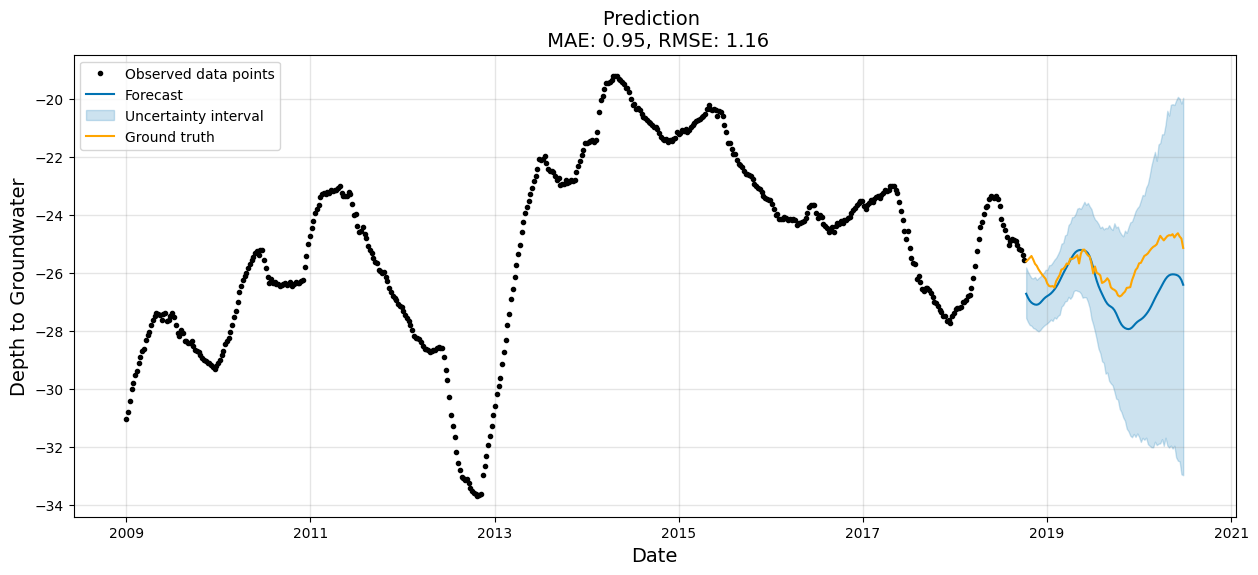

In [68]:
# Prophet Plot the forecast

f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

#### **WHY ISN'T THE STARTING POINT OF THE FORECAST LINE EXACTLY THE SAME FINISHING POINT OF THE OBSERVED DATA?** 

**Why the Misalignment?**

The slight misalignment you observe is typically due to the way Prophet handles the transition between the historical data and the forecast period. Here's a breakdown for beginners:

Training Data: Prophet uses the historical data (your train dataframe) to learn patterns and build its model. This data ends at a specific point in time.

Forecast Period: When you ask Prophet to forecast, you specify a future period (e.g., 365 days). Prophet then extends the model's predictions into this future period.

Smoothing: Prophet's model often involves smoothing or averaging of the data to capture underlying trends and seasonality. This smoothing can create a slight discrepancy between the last observed value and the first forecasted value.

Uncertainty: Prophet also incorporates uncertainty into its forecasts. The uncertainty interval (the blue shaded area) usually widens as you move further into the forecast period. This means the model is less certain about the exact values at the beginning of the forecast compared to the historical data it has seen.

Potential Gaps: The misalignment can be more noticeable if there is a gap between your last observed data point and the start of your forecast period. For instance, if your historical data ends on Dec 31, 2023, and you request a forecast starting on Jan 1, 2024, this gap can cause a more noticeable visual misalignment.

### **NOTE:  the "Uncertainty Interval" is automatically plotted by Prophet's built-in plot() function**


* How it's calculated?

The Uncertainty Interval in Prophet is derived from the model's estimated uncertainty in the forecast. It's not directly calculated using RMSE. Instead, it's based on the following:

1. Trend Uncertainty: Prophet models the trend component of the time series, and it estimates uncertainty in this trend. This uncertainty is influenced by the flexibility of the trend model (e.g., linear vs. logistic) and the amount of data available.

2. Seasonality Uncertainty: Similarly, Prophet models seasonality (daily, weekly, yearly) and estimates uncertainty in these components. The uncertainty depends on the strength and regularity of the seasonal patterns in the data.

3. Additive/Multiplicative Model: Whether the model is additive or multiplicative affects how uncertainties are combined.

4. MCMC Samples (if used): If you've used Markov Chain Monte Carlo (MCMC) sampling for uncertainty estimation (by setting mcmc_samples > 0 during model creation), the uncertainty interval will reflect the distribution of the MCMC samples.

The blue area (Uncertainty Interval) represents a range of values where the model believes the actual future values are likely to fall, with a certain degree of confidence **(typically 95% for yhat_lower and yhat_upper)**. This range is wider when the model is less certain about the forecast

**IT IS NOT calculated based on the the RMSE above and below forecast line**


**Relationship between the Uncertainty Interval and the RMSE**

* While RMSE is a measure of overall forecast error, the uncertainty interval is a more nuanced way to visualize the model's confidence in specific parts of the forecast.
* A higher RMSE may correspond to wider uncertainty intervals, but the relationship is not direct. The intervals are primarily driven by the model's assumptions and internal calculations of trend and seasonality uncertainty.

**Customization of the built-in "Uncertainty Interval" of Prophet**

The appearance of the uncertainty intervals can be modified through the fill_between function used by Prophet for plotting:

* uncertainty=True: Include the uncertainty interval on the plots. This is the default.
* plot_cap: If True, plot the caps on the confidence interval. This is the default.

## ARIMA

The second model that I want to try is ARIMA.

The Auto-Regressive Integrated Moving Average (ARIMA) model describes the **autocorrelations** in the data. The model assumes that the time-series is **stationary**. It consists of three main parts:
* <font color='purple'>Auto-Regressive (AR) filter (long term)</font>:
    
    $\color{purple}{y_t = c + \alpha_1 y_{t-1} + \dots \alpha_{\color{purple}p}y_{t-\color{purple}p} + \epsilon_t = c + \sum_{i=1}^p{\alpha_i}y_{t-i} + \epsilon_t}$  -> p
* <font color='orange'> Integration filter (stochastic trend)</font>
    
    -> d
* <font color='blue'>Moving Average (MA) filter (short term)</font>:

    $\color{blue}{y_t = c + \epsilon_t + \beta_1 \epsilon_{t-1} + \dots + \beta_{q} \epsilon_{t-q} = c + \epsilon_t + \sum_{i=1}^q{\beta_i}\epsilon_{t-i}} $  -> q


**ARIMA**: $y_t = c + \color{purple}{\alpha_1 y_{t-1} + \dots + \alpha_{\color{purple}p}y_{t-\color{purple}p}} + \color{blue}{\epsilon_t + \beta_1 \epsilon_{t-1} + \dots + \beta_{q} \epsilon_{t-q}}$


ARIMA(
<font color='purple'>p</font>,
<font color='orange'>d</font>,
<font color='blue'>q</font>)

* <font color='purple'>p</font>: Lag order (reference  PACF in [Autocorrelation Analysis](#4.1-Autocorrelation-Analysis))
* <font color='orange'>d</font>: Degree of differencing. (reference  Differencing in [Stationarity](#2.3-Stationarity))
* <font color='blue'>q</font>: Order of moving average (check out ACF in [Autocorrelation Analysis](#4.1-Autocorrelation-Analysis))

### Steps to analyze ARIMA

* **Step 1 — Check stationarity**: If a time series has a trend or seasonality component, it must be made stationary before we can use ARIMA to forecast.
* **Step 2 — Difference**: If the time series is not stationary, it needs to be stationarized through differencing. Take the first difference, then check for stationarity. Take as many differences as it takes. Make sure you check seasonal differencing as well.
* **Step 3 — Filter out a validation sample**: This will be used to validate how accurate our model is. Use train test validation split to achieve this.
* **Step 4 — Select AR and MA terms**: Use the ACF and PACF to decide whether to include an AR term(s), MA term(s), or both.
* **Step 5 — Build the model**: Build the model and set the number of periods to forecast to N (depends on your needs).
* **Step 6 — Validate model**: Compare the predicted values to the actuals in the validation sample.

In [73]:
from statsmodels.tsa.arima.model import ARIMA

# Fit model
model = ARIMA(y_train, order=(1,1,1))
model_fit = model.fit()

# Prediction with ARIMA
y_pred = model_fit.forecast(90)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))
print(Fore.GREEN + 'MAE: {}'.format(score_mae))

RMSE: 1.402615843711107
MAE: 1.2004386724880665


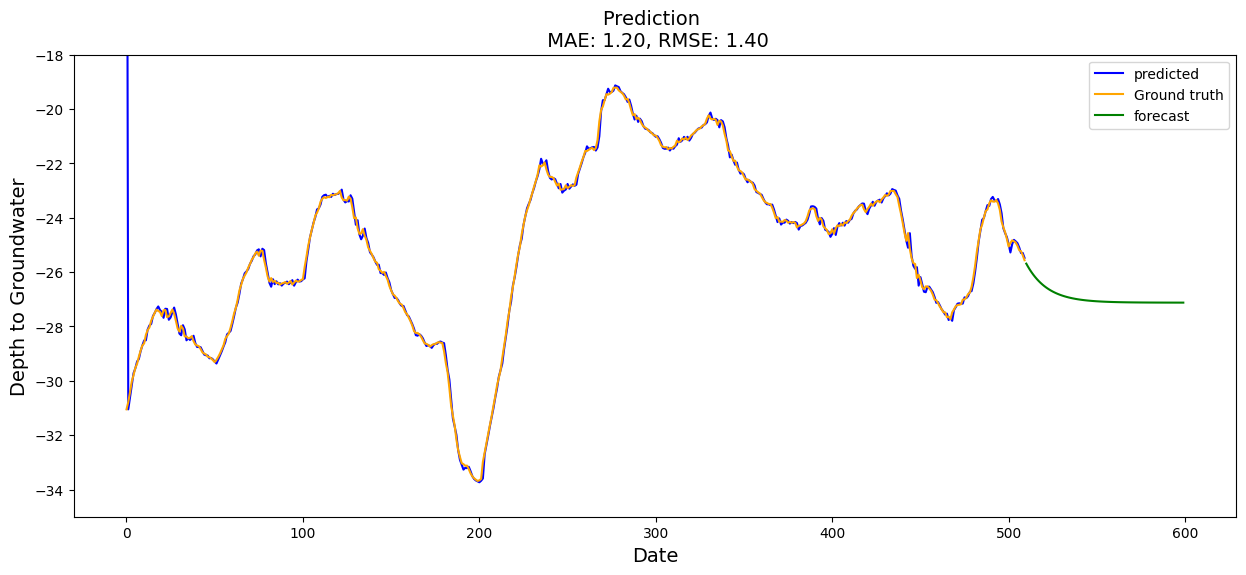

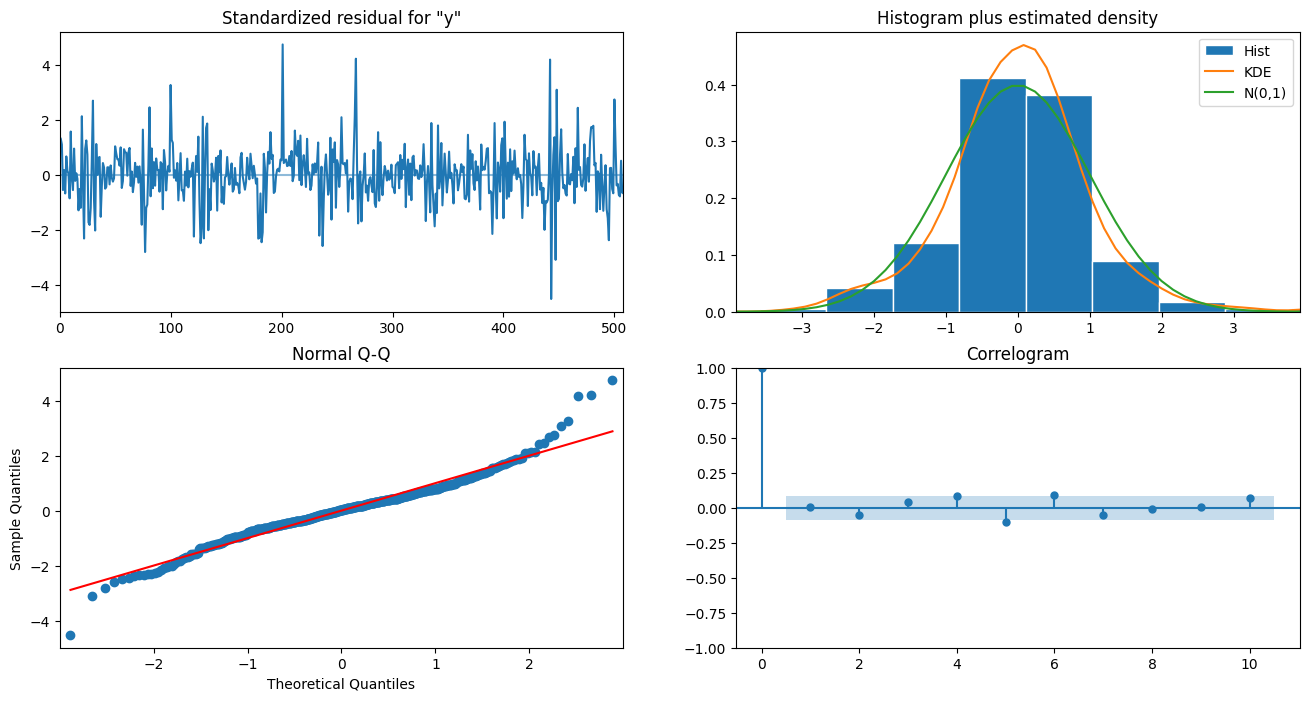

In [97]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

# Get the predictions from the fitted model.
y_pred = model_fit.predict(start=y_train.index[0], end=y_train.index[-1]) # Predict over the training set

#Use sns.lineplot for both predicted and actual values to produce the forecast visualization.
sns.lineplot(x=y_train.index, y=y_pred, ax=ax, color='blue', label='predicted')
sns.lineplot(x=y_train.index, y=y_train['y'], ax=ax, color='orange', label='Ground truth')

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

# Forecast on the validation set
forecast = model_fit.get_forecast(steps=len(y_valid))
y_pred_forecast = forecast.predicted_mean

# Use sns.lineplot to visualize the forecasted data for validation.
sns.lineplot(x=y_valid.index, y=y_pred_forecast, ax=ax, color='green', label='forecast')


# Display plots
fig = model_fit.plot_diagnostics(figsize=(16,8))
ax.set_ylim(-35, -18) # Set y-axis limits to ensure forecast is visible if it extends beyond the current data
plt.show()

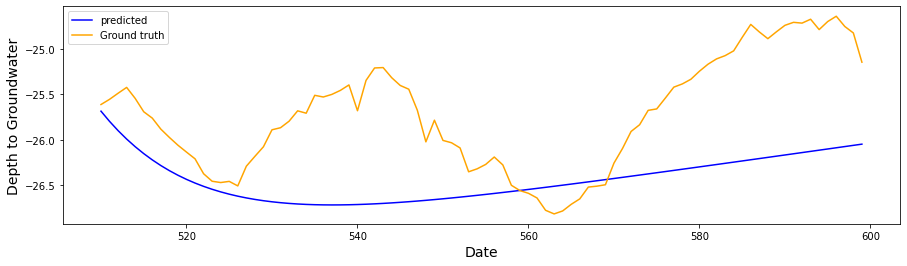

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(15)

sns.lineplot(x=x_valid.index, y=y_pred, ax=ax, color='blue', label='predicted') #navajowhite
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

# **REFLECITON:** Until now, we can see Prophet model is way more accurate and sophisticated on its predictions than ARIMA.

## Auto-ARIMA

In [98]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.8 MB/s eta 0:00:00


In [99]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(y_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-631.136, Time=2.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-242.692, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-574.047, Time=0.52 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-427.347, Time=1.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-243.054, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-629.209, Time=8.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-629.237, Time=5.54 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-492.779, Time=2.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-611.065, Time=5.01 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-628.351, Time=8.53 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-632.995, Time=3.60 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-428.258, Time=1.85 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-575.735, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-631.069, Time=4.55 sec
 ARIMA(1,1,2)(0,0,0)[0]          

As we saw in the previous Steps, AutoARIMA (auto_arima) validates that (1,1,1) is the best configuration for (p,d,q).

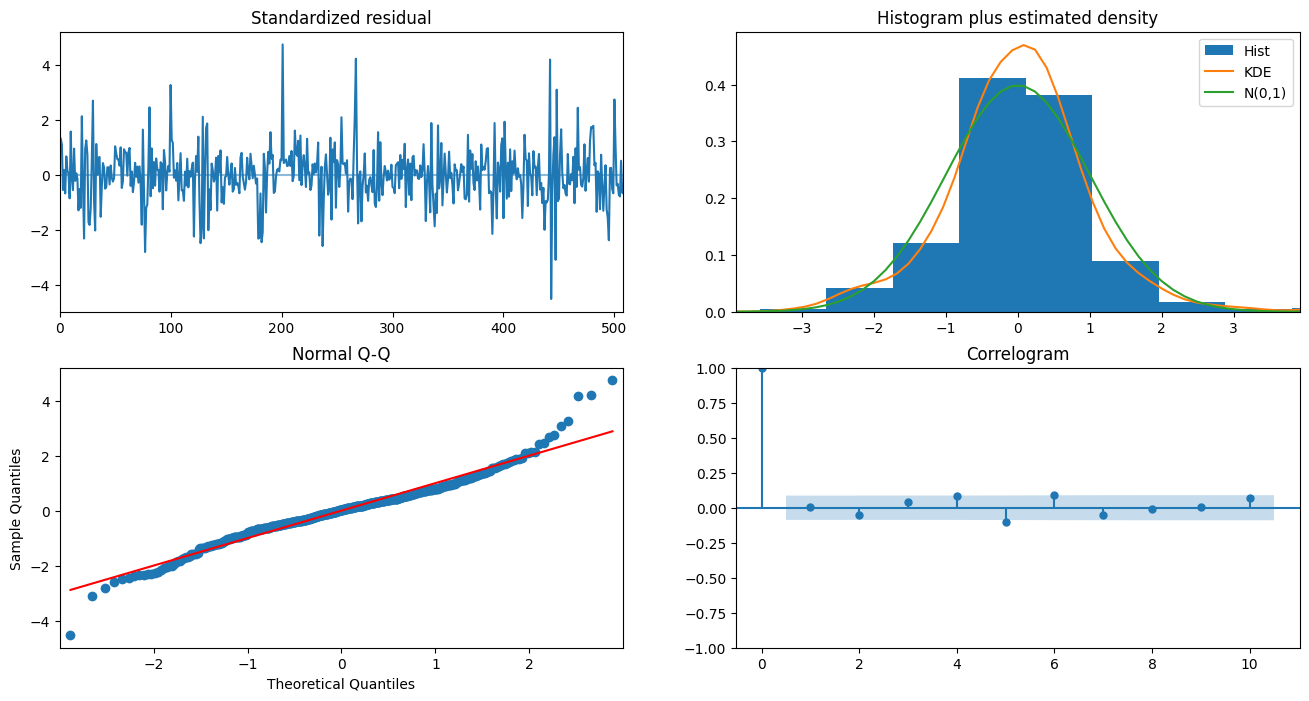

In [100]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

So how to interpret the plot diagnostics?

- **Top left**: The residual errors seem to fluctuate around a mean of zero and have a uniform variance between (-4, 4).

- **Top Right**: The density plot suggests normal distribution with a mean of zero.

- **Bottom left**: The most part of the blue dots are over the red line, so it seems that the distribution in very low skewed (not skewed for me).

- **Bottom Right**: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated.

## LSTM

Multi-layered LSTM recurrent neural network to predict the last value of a sequence of values.

The following data pre-processing and feature engineering need to be done before constructing the LSTM model.
- Create the dataset, ensure all data is float.
- Normalize the features.
- Split into training and test sets.
- Convert an array of values into a dataset matrix.
- Reshape into X=t and Y=t+1.
- Reshape input to be 3D (num_samples, num_timesteps, num_features).

In [81]:
from sklearn.preprocessing import MinMaxScaler

data = univariate_df.filter(['y'])
# Convert the dataframe to a numpy array
dataset = data.values

scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

array([[-0.81796644],
       [-0.79970385],
       [-0.7745311 ],
       [-0.74679171],
       [-0.73099704],
       [-0.71253702],
       [-0.7023692 ],
       [-0.68410661],
       [-0.66890424],
       [-0.65528134]])

In [82]:
# Defines the rolling window
look_back = 52
# Split into train and test sets
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

406 90


In [83]:
!pip install keras.models
!pip install keras.layers
!pip install tensorflow


ERROR: Could not find a version that satisfies the requirement keras.layers (from versions: none)
ERROR: No matching distribution found for keras.layers


In [84]:
# multi-layered LSTM recurrent neural network MODEL SETUP

from tensorflow import keras
from keras import layers
from keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_test))

model.summary()

Epoch 1/5
406/406 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0208 - val_loss: 0.0029
Epoch 2/5
406/406 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0031 - val_loss: 8.6652e-04
Epoch 3/5
406/406 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0019 - val_loss: 2.9603e-04
Epoch 4/5
406/406 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 5/5
406/406 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0014 - val_loss: 0.0025


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 128)              │          92,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 431,195 (1.64 MB)

 Trainable params: 143,731 (561.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 287,464 (1.10 MB)

In [85]:
# Let's predict with the multi-layered LSTM recurrent neural network MODEL
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Get the root mean squared error (RMSE) and MAE
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))
print(Fore.GREEN + 'MAE: {}'.format(score_mae))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
RMSE: 0.730226112446834
MAE: 0.6905104123070128


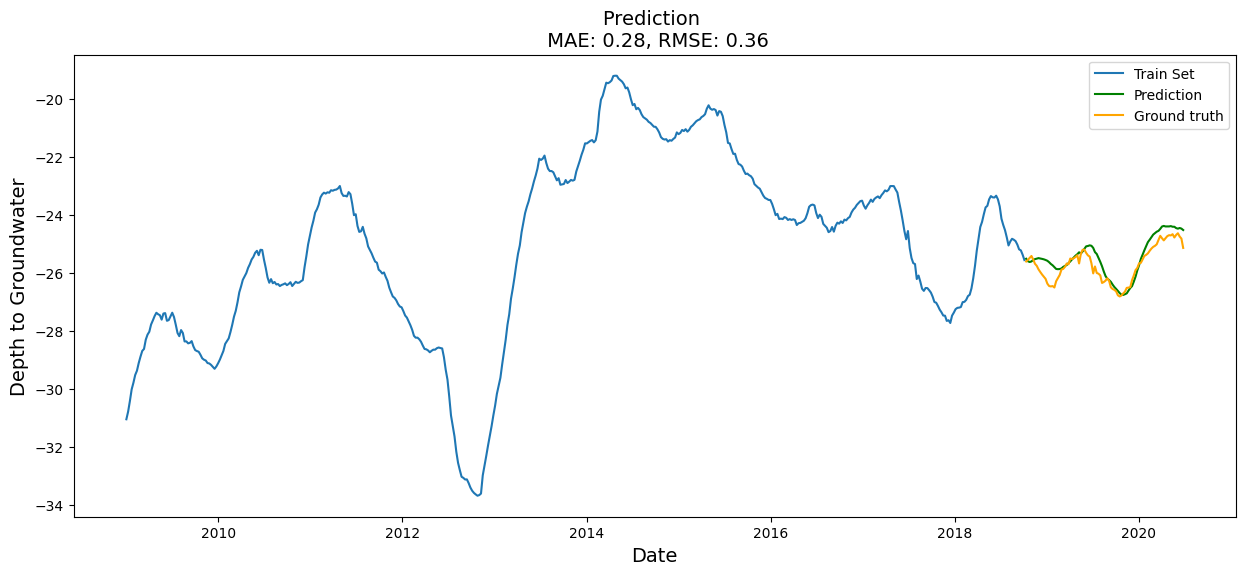

In [107]:
x_train_ticks = univariate_df.head(train_size)['ds']
y_train = univariate_df.head(train_size)['y']
x_test_ticks = univariate_df.tail(test_size)['ds']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

## Models for Multivariate Time Series

Analize multivariate TimeSeries forecasting.

**Multivariate time series:** Multiple variables are varying over time. For example, a tri-axial accelerometer. There are three accelerations, one for each axis (x,y,z) and they vary simultaneously over time.

In [75]:
feature_columns = [
    'rainfall',
    'temperature',
    'drainage_volume',
    'river_hydrometry',
]
target_column = ['depth_to_groundwater']

train_size = int(0.85 * len(df))

multivariate_df = df[['date'] + target_column + feature_columns].copy()
multivariate_df.columns = ['ds', 'y'] + feature_columns

train = multivariate_df.iloc[:train_size, :]
x_train, y_train = pd.DataFrame(multivariate_df.iloc[:train_size, [0,2,3,4,5]]), pd.DataFrame(multivariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(multivariate_df.iloc[train_size:, [0,2,3,4,5]]), pd.DataFrame(multivariate_df.iloc[train_size:, 1])

train.head()

ds          y  rainfall  temperature  drainage_volume  \
0 2009-01-01 -31.048571  0.000000     1.657143    -28164.918857   
1 2009-01-08 -30.784286  0.285714     4.571429    -29755.789714   
2 2009-01-15 -30.420000  0.028571     7.528571    -25463.190857   
3 2009-01-22 -30.018571  0.585714     6.214286    -23854.422857   
4 2009-01-29 -29.790000  1.414286     5.771429    -25210.532571   

   river_hydrometry  
0          2.371429  
1          2.314286  
2          2.300000  
3          2.500000  
4          2.500000

## Finally, multivariate Prophet

In [ ]:
# Train the model
model = Prophet()
model.add_regressor('rainfall')
model.add_regressor('temperature')
model.add_regressor('drainage_volume')
model.add_regressor('river_hydrometry')

# Fit the model with train set
model.fit(train)

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))
print(Fore.GREEN + 'MAE: {}'.format(score_mae))

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp826nhaxz/x0x4bnpm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp826nhaxz/rf0d72oc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45008', 'data', 'file=/tmp/tmp826nhaxz/x0x4bnpm.json', 'init=/tmp/tmp826nhaxz/rf0d72oc.json', 'output', 'file=/tmp/tmp826nhaxz/prophet_modelflloxiqv/prophet_model-20250214081248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:12:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:12:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 0.9892543493140717
MAE: 0.8187347715857385


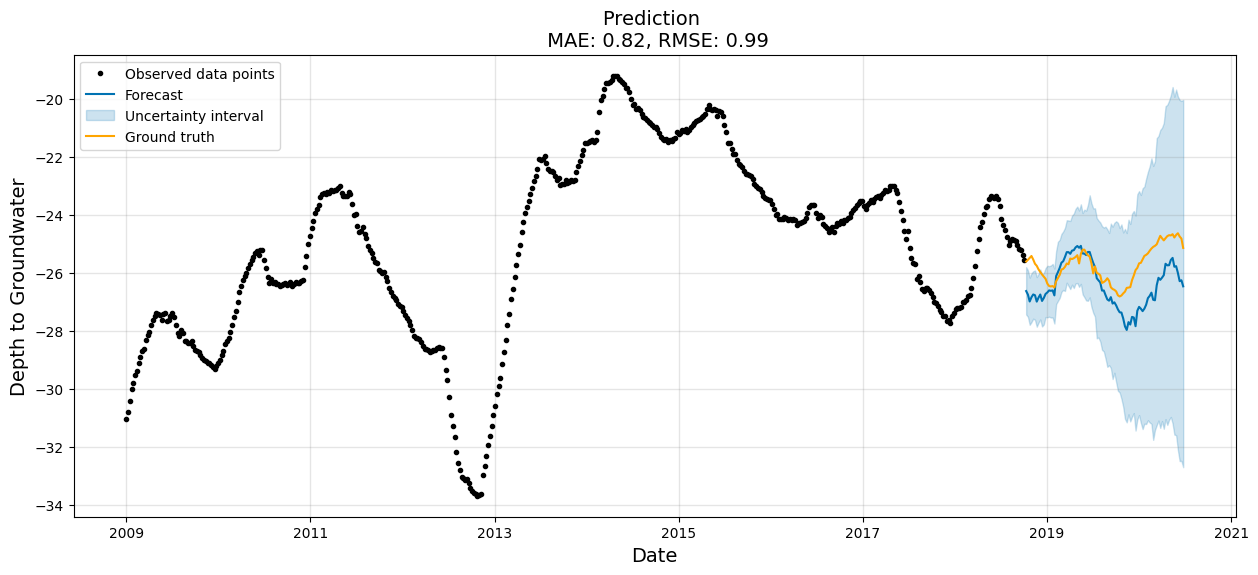

In [77]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

# Conclusions 💎

The best results are taken from Univariate LSTM (with rolling window of 1 year) and multi-variate Prophet.


**Multi-layered LSTM Recurrent Neural Network: BEST MODEL BY FAR**
  * RMSE: 0.730226112446834
  * MAE: 0.6905104123070128

* **Multi-variate Prophet**
  * RMSE: 0.9892543493140717
  * MAE: 0.8187347715857385